In [59]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 16

In [60]:
import warnings
import itertools
warnings.filterwarnings("ignore") # specify to ignore warning messages

In [61]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TimeSeries/MER_T12_06.csv")
df.head()

MSN  YYYYMM   Value  Column_Order  \
0  CLEIEUS  197301  72.076             1   
1  CLEIEUS  197302  64.442             1   
2  CLEIEUS  197303  64.084             1   
3  CLEIEUS  197304  60.842             1   
4  CLEIEUS  197305  61.798             1   

                                Description  \
0  Coal Electric Power Sector CO2 Emissions   
1  Coal Electric Power Sector CO2 Emissions   
2  Coal Electric Power Sector CO2 Emissions   
3  Coal Electric Power Sector CO2 Emissions   
4  Coal Electric Power Sector CO2 Emissions   

                                    Unit  
0  Million Metric Tons of Carbon Dioxide  
1  Million Metric Tons of Carbon Dioxide  
2  Million Metric Tons of Carbon Dioxide  
3  Million Metric Tons of Carbon Dioxide  
4  Million Metric Tons of Carbon Dioxide

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           5094 non-null   object
 1   YYYYMM        5094 non-null   int64 
 2   Value         5094 non-null   object
 3   Column_Order  5094 non-null   int64 
 4   Description   5094 non-null   object
 5   Unit          5094 non-null   object
dtypes: int64(2), object(4)
memory usage: 238.9+ KB


The dataset contains 6 columns, with 2 of them being of integer data type and 4 as object data types, comprising a total of 5096 observations. By default, the dataset is retrieved as a DataFrame, not as a time series. To properly read and interpret the dataset as a time series, specific arguments need to be passed to the read_csv function, as demonstrated in the code snippet below.

In [63]:
dateparse = lambda x: pd.to_datetime(x, format='%Y%m', errors = 'coerce')
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TimeSeries/MER_T12_06.csv", parse_dates=['YYYYMM'], index_col='YYYYMM', date_parser=dateparse)
df.head()

MSN   Value  Column_Order  \
YYYYMM                                      
1973-01-01  CLEIEUS  72.076             1   
1973-02-01  CLEIEUS  64.442             1   
1973-03-01  CLEIEUS  64.084             1   
1973-04-01  CLEIEUS  60.842             1   
1973-05-01  CLEIEUS  61.798             1   

                                         Description  \
YYYYMM                                                 
1973-01-01  Coal Electric Power Sector CO2 Emissions   
1973-02-01  Coal Electric Power Sector CO2 Emissions   
1973-03-01  Coal Electric Power Sector CO2 Emissions   
1973-04-01  Coal Electric Power Sector CO2 Emissions   
1973-05-01  Coal Electric Power Sector CO2 Emissions   

                                             Unit  
YYYYMM                                             
1973-01-01  Million Metric Tons of Carbon Dioxide  
1973-02-01  Million Metric Tons of Carbon Dioxide  
1973-03-01  Million Metric Tons of Carbon Dioxide  
1973-04-01  Million Metric Tons of Carbon Dioxide  
1973-05-01  Million Metric Tons of Carbon Dioxide

In [64]:
df.Column_Order.value_counts()

Column_Order
1    566
2    566
3    566
4    566
5    566
6    566
7    566
8    566
9    566
Name: count, dtype: int64

In [65]:
ts = df[df.index.notna()]
ts.head(15)

MSN   Value  Column_Order  \
YYYYMM                                      
1973-01-01  CLEIEUS  72.076             1   
1973-02-01  CLEIEUS  64.442             1   
1973-03-01  CLEIEUS  64.084             1   
1973-04-01  CLEIEUS  60.842             1   
1973-05-01  CLEIEUS  61.798             1   
1973-06-01  CLEIEUS  66.538             1   
1973-07-01  CLEIEUS  72.626             1   
1973-08-01  CLEIEUS  75.181             1   
1973-09-01  CLEIEUS  68.397             1   
1973-10-01  CLEIEUS  67.668             1   
1973-11-01  CLEIEUS  67.021             1   
1973-12-01  CLEIEUS  71.118             1   
1974-01-01  CLEIEUS   70.55             1   
1974-02-01  CLEIEUS  62.929             1   
1974-03-01  CLEIEUS  64.519             1   

                                         Description  \
YYYYMM                                                 
1973-01-01  Coal Electric Power Sector CO2 Emissions   
1973-02-01  Coal Electric Power Sector CO2 Emissions   
1973-03-01  Coal Electric Power Sector CO2 Emissions   
1973-04-01  Coal Electric Power Sector CO2 Emissions   
1973-05-01  Coal Electric Power Sector CO2 Emissions   
1973-06-01  Coal Electric Power Sector CO2 Emissions   
1973-07-01  Coal Electric Power Sector CO2 Emissions   
1973-08-01  Coal Electric Power Sector CO2 Emissions   
1973-09-01  Coal Electric Power Sector CO2 Emissions   
1973-10-01  Coal Electric Power Sector CO2 Emissions   
1973-11-01  Coal Electric Power Sector CO2 Emissions   
1973-12-01  Coal Electric Power Sector CO2 Emissions   
1974-01-01  Coal Electric Power Sector CO2 Emissions   
1974-02-01  Coal Electric Power Sector CO2 Emissions   
1974-03-01  Coal Electric Power Sector CO2 Emissions   

                                             Unit  
YYYYMM                                             
1973-01-01  Million Metric Tons of Carbon Dioxide  
1973-02-01  Million Metric Tons of Carbon Dioxide  
1973-03-01  Million Metric Tons of Carbon Dioxide  
1973-04-01  Million Metric Tons of Carbon Dioxide  
1973-05-01  Million Metric Tons of Carbon Dioxide  
1973-06-01  Million Metric Tons of Carbon Dioxide  
1973-07-01  Million Metric Tons of Carbon Dioxide  
1973-08-01  Million Metric Tons of Carbon Dioxide  
1973-09-01  Million Metric Tons of Carbon Dioxide  
1973-10-01  Million Metric Tons of Carbon Dioxide  
1973-11-01  Million Metric Tons of Carbon Dioxide  
1973-12-01  Million Metric Tons of Carbon Dioxide  
1974-01-01  Million Metric Tons of Carbon Dioxide  
1974-02-01  Million Metric Tons of Carbon Dioxide  
1974-03-01  Million Metric Tons of Carbon Dioxide

In [66]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4707 entries, 1973-01-01 to 2016-07-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           4707 non-null   object
 1   Value         4707 non-null   object
 2   Column_Order  4707 non-null   int64 
 3   Description   4707 non-null   object
 4   Unit          4707 non-null   object
dtypes: int64(1), object(4)
memory usage: 220.6+ KB


In [67]:
ts['Value'] = pd.to_numeric(ts['Value'] , errors='coerce')
ts.head()

MSN   Value  Column_Order  \
YYYYMM                                      
1973-01-01  CLEIEUS  72.076             1   
1973-02-01  CLEIEUS  64.442             1   
1973-03-01  CLEIEUS  64.084             1   
1973-04-01  CLEIEUS  60.842             1   
1973-05-01  CLEIEUS  61.798             1   

                                         Description  \
YYYYMM                                                 
1973-01-01  Coal Electric Power Sector CO2 Emissions   
1973-02-01  Coal Electric Power Sector CO2 Emissions   
1973-03-01  Coal Electric Power Sector CO2 Emissions   
1973-04-01  Coal Electric Power Sector CO2 Emissions   
1973-05-01  Coal Electric Power Sector CO2 Emissions   

                                             Unit  
YYYYMM                                             
1973-01-01  Million Metric Tons of Carbon Dioxide  
1973-02-01  Million Metric Tons of Carbon Dioxide  
1973-03-01  Million Metric Tons of Carbon Dioxide  
1973-04-01  Million Metric Tons of Carbon Dioxide  
1973-05-01  Million Metric Tons of Carbon Dioxide

In [68]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4707 entries, 1973-01-01 to 2016-07-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSN           4707 non-null   object 
 1   Value         4323 non-null   float64
 2   Column_Order  4707 non-null   int64  
 3   Description   4707 non-null   object 
 4   Unit          4707 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 220.6+ KB


In [69]:
ts.isnull().sum()

MSN               0
Value           384
Column_Order      0
Description       0
Unit              0
dtype: int64

In [70]:
ts_1 = ts.fillna(method='ffill')


In [71]:
ts_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4707 entries, 1973-01-01 to 2016-07-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSN           4707 non-null   object 
 1   Value         4707 non-null   float64
 2   Column_Order  4707 non-null   int64  
 3   Description   4707 non-null   object 
 4   Unit          4707 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 220.6+ KB


In [72]:
#group by products on description
Energy_sources = ts_1.groupby('Description')
Energy_sources.tail(50)

MSN    Value  Column_Order  \
YYYYMM                                       
2012-06-01  CLEIEUS  131.167             1   
2012-07-01  CLEIEUS  158.331             1   
2012-08-01  CLEIEUS  151.360             1   
2012-09-01  CLEIEUS  127.184             1   
2012-10-01  CLEIEUS  121.741             1   
...             ...      ...           ...   
2016-03-01  TXEIEUS  115.997             9   
2016-04-01  TXEIEUS  113.815             9   
2016-05-01  TXEIEUS  129.440             9   
2016-06-01  TXEIEUS  172.074             9   
2016-07-01  TXEIEUS  201.958             9   

                                                 Description  \
YYYYMM                                                         
2012-06-01          Coal Electric Power Sector CO2 Emissions   
2012-07-01          Coal Electric Power Sector CO2 Emissions   
2012-08-01          Coal Electric Power Sector CO2 Emissions   
2012-09-01          Coal Electric Power Sector CO2 Emissions   
2012-10-01          Coal Electric Power Sector CO2 Emissions   
...                                                      ...   
2016-03-01  Total Energy Electric Power Sector CO2 Emissions   
2016-04-01  Total Energy Electric Power Sector CO2 Emissions   
2016-05-01  Total Energy Electric Power Sector CO2 Emissions   
2016-06-01  Total Energy Electric Power Sector CO2 Emissions   
2016-07-01  Total Energy Electric Power Sector CO2 Emissions   

                                             Unit  
YYYYMM                                             
2012-06-01  Million Metric Tons of Carbon Dioxide  
2012-07-01  Million Metric Tons of Carbon Dioxide  
2012-08-01  Million Metric Tons of Carbon Dioxide  
2012-09-01  Million Metric Tons of Carbon Dioxide  
2012-10-01  Million Metric Tons of Carbon Dioxide  
...                                           ...  
2016-03-01  Million Metric Tons of Carbon Dioxide  
2016-04-01  Million Metric Tons of Carbon Dioxide  
2016-05-01  Million Metric Tons of Carbon Dioxide  
2016-06-01  Million Metric Tons of Carbon Dioxide  
2016-07-01  Million Metric Tons of Carbon Dioxide  

[450 rows x 5 columns]

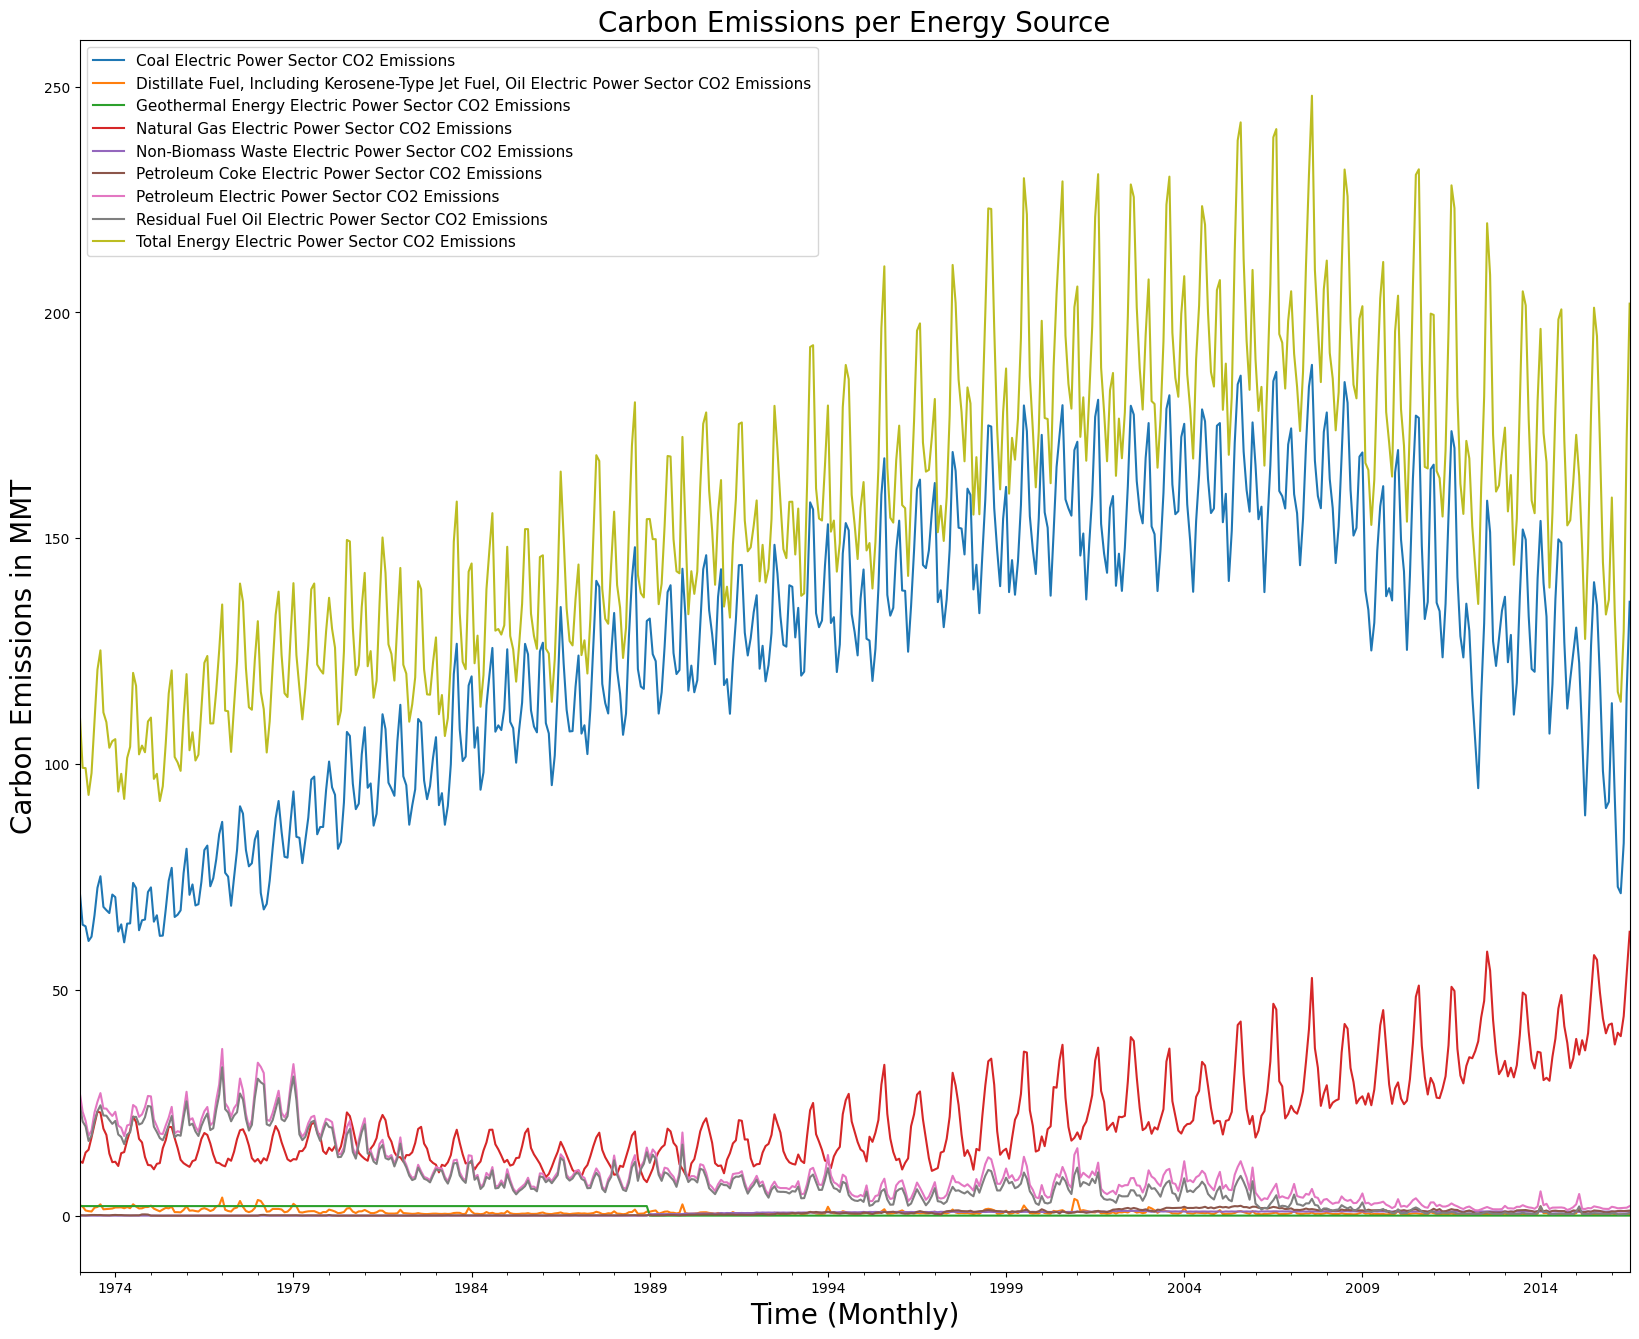

In [73]:
fig, ax = plt.subplots()

for desc, group in Energy_sources:
    group.plot(y='Value', label=desc, ax=ax)

# Setting title and labels outside the loop
ax.set_title('Carbon Emissions per Energy Source', fontsize=20)
ax.set_xlabel('Time (Monthly)', fontsize=20)
ax.set_ylabel('Carbon Emissions in MMT', fontsize=20)
ax.legend(fontsize=11)

plt.show()


We can analyze and visualize the trend and seasonality of CO2 emissions from various energy sources individually. For instance, CO2 emissions from coal exhibit a clear upward trend from 1973 to 2006, followed by a noticeable decline until 2016. This pattern reflects the increasing reliance on coal during earlier years and the subsequent shift towards cleaner energy sources or more efficient technologies in recent years.

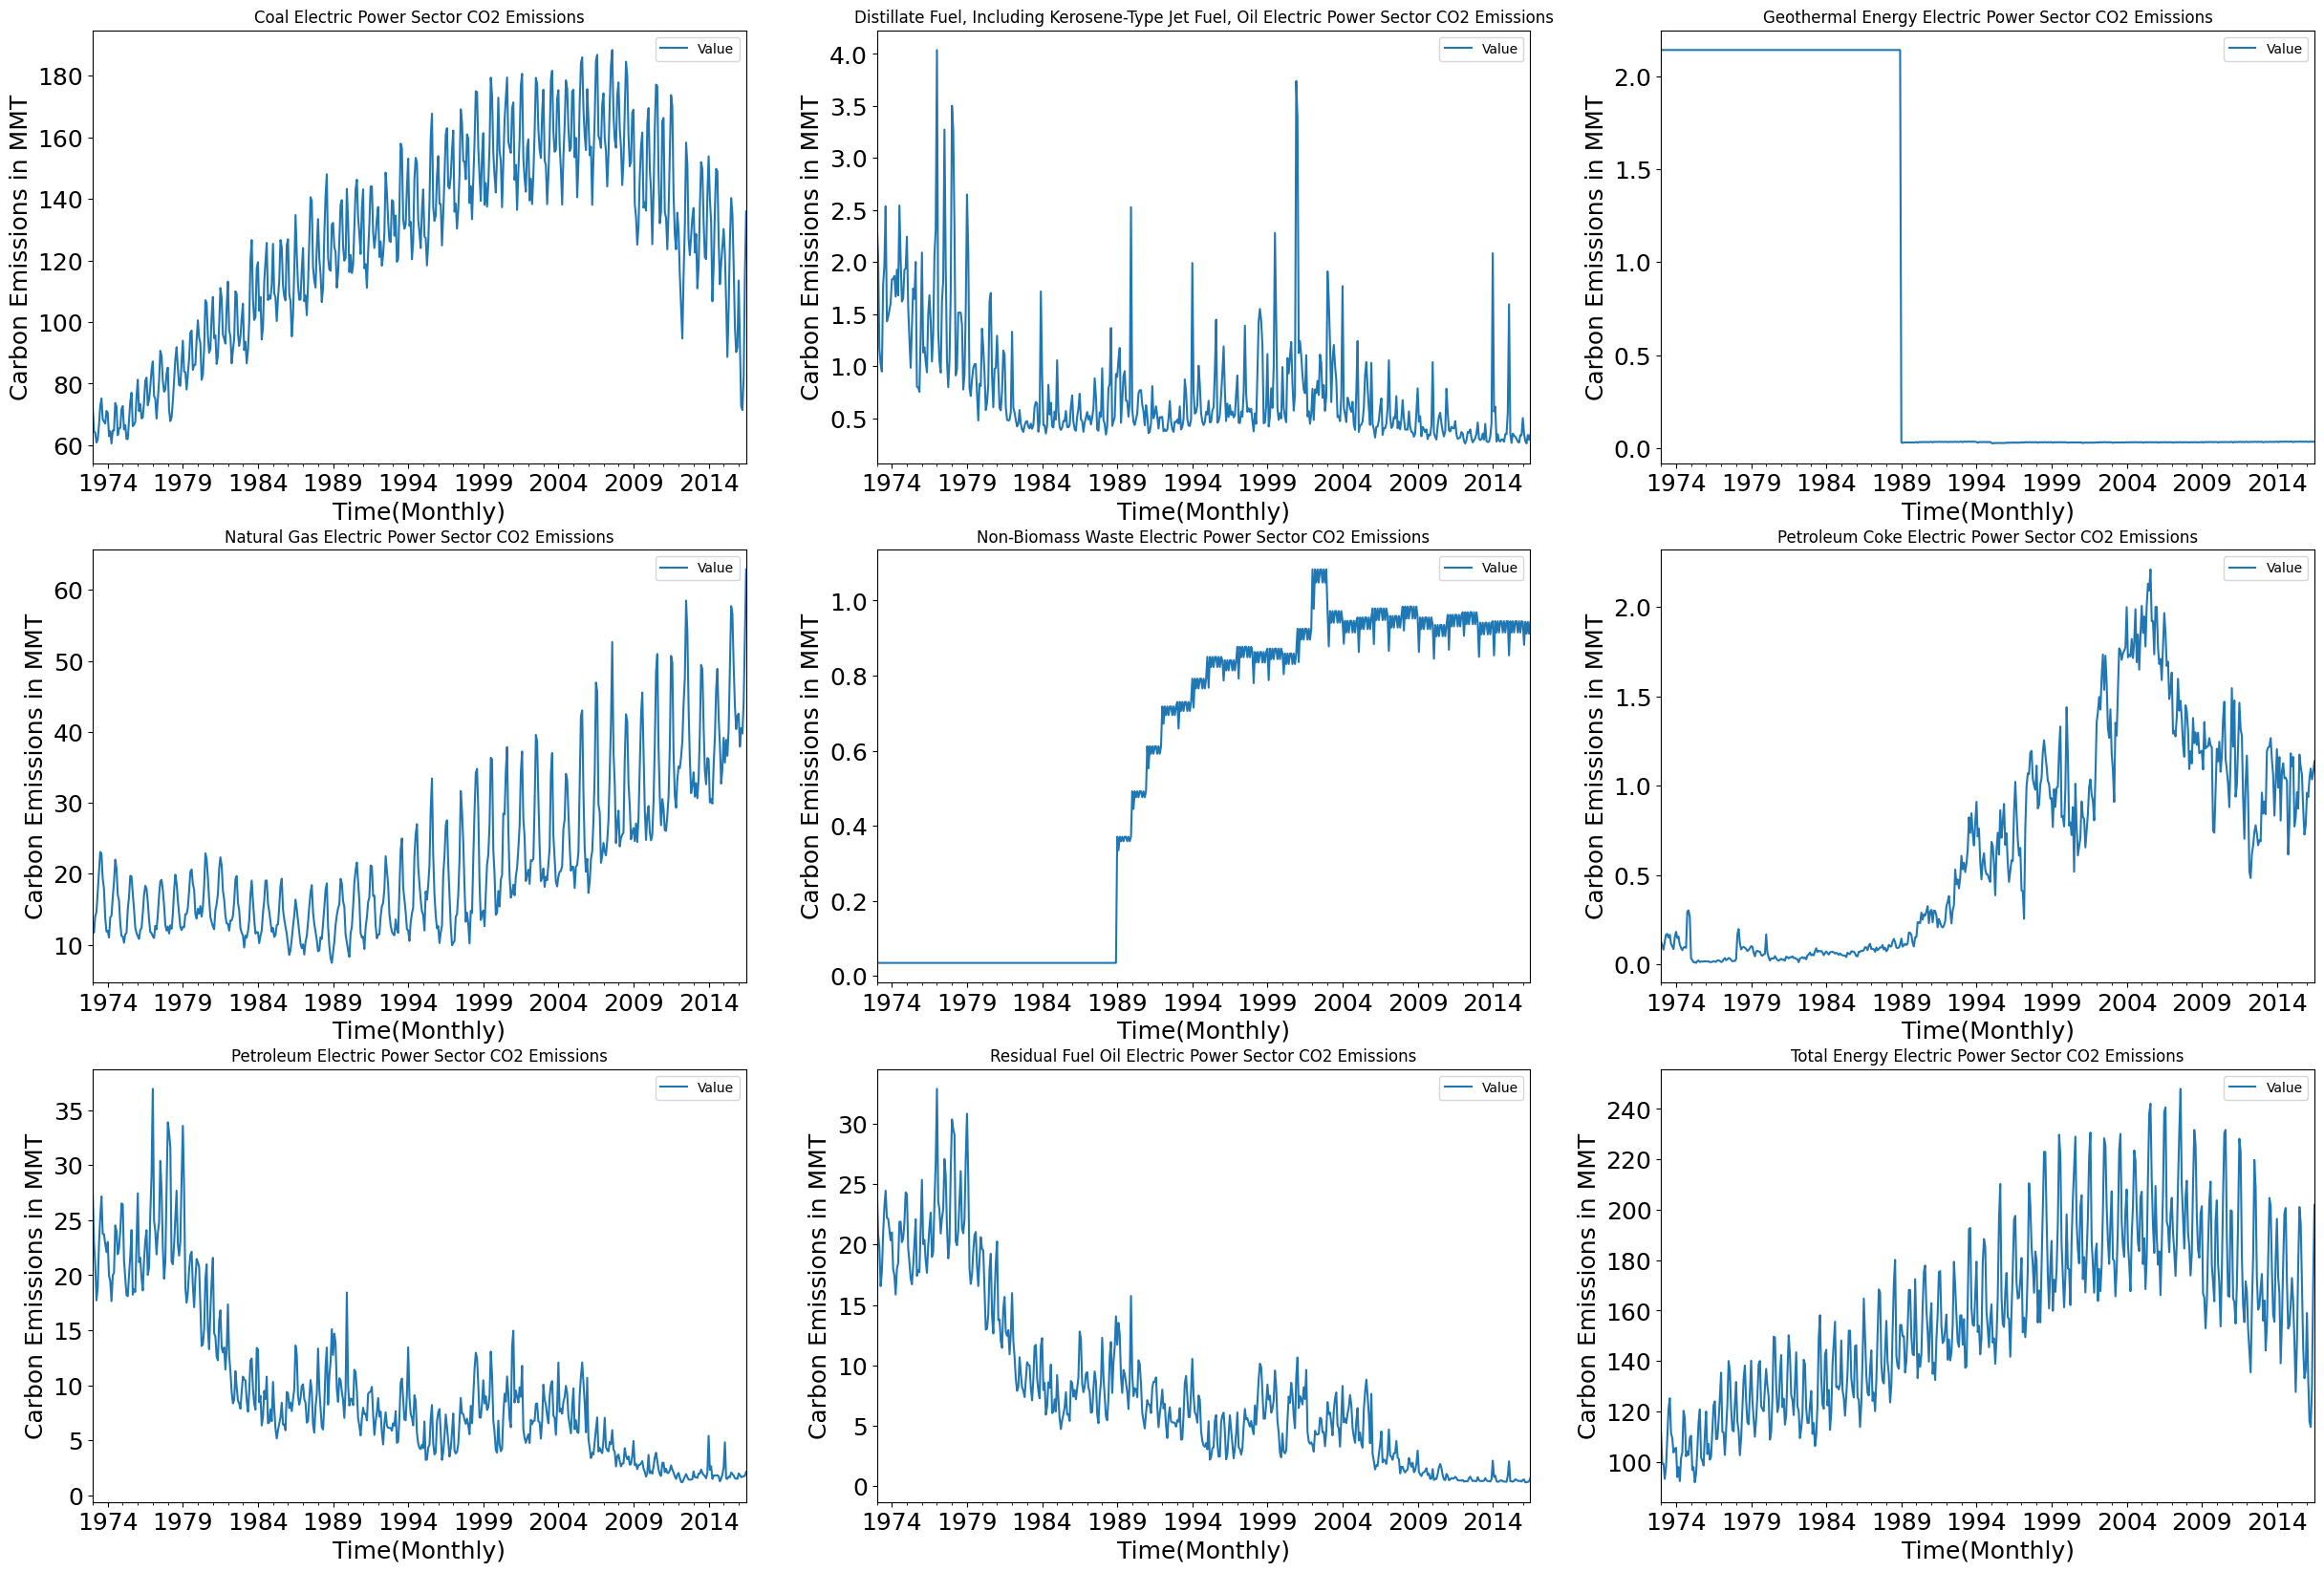

In [74]:
fig, axes = plt.subplots(3,3, figsize = (30, 20))
for (desc, group), ax in zip(Energy_sources, axes.flatten()):
    group.plot(y='Value',ax = ax, title=desc, fontsize = 18)
    ax.set_xlabel('Time(Monthly)')
    ax.set_ylabel('Carbon Emissions in MMT')
    ax.xaxis.label.set_size(18)
    ax.yaxis.label.set_size(18)

In recent years, natural gas consumption has risen, while coal usage for power generation has declined. CO2 emissions plots illustrate this trend: as emissions from coal decrease, emissions from natural gas increase, reflecting a significant shift in the energy landscape.

# **CO2 Emission per energy source**

In [75]:
co2_per_source=ts_1.groupby('Description')['Value'].sum()
co2_per_source.index

Index(['Coal Electric Power Sector CO2 Emissions',
       'Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions',
       'Geothermal Energy Electric Power Sector CO2 Emissions',
       'Natural Gas Electric Power Sector CO2 Emissions',
       'Non-Biomass Waste Electric Power Sector CO2 Emissions',
       'Petroleum Coke Electric Power Sector CO2 Emissions',
       'Petroleum Electric Power Sector CO2 Emissions',
       'Residual Fuel Oil Electric Power Sector CO2 Emissions',
       'Total Energy Electric Power Sector CO2 Emissions'],
      dtype='object', name='Description')

In [76]:
co2_per_source.info()

<class 'pandas.core.series.Series'>
Index: 9 entries, Coal Electric Power Sector CO2 Emissions to Total Energy Electric Power Sector CO2 Emissions
Series name: Value
Non-Null Count  Dtype  
--------------  -----  
9 non-null      float64
dtypes: float64(1)
memory usage: 144.0+ bytes


In [77]:
new_index_names = ['Coal', 'Distillate Fuel', 'Geothermal', 'Natural Gas', 'Non-Biomas Waste', 'Petroleum Coke Electric', 'Petroleum Electric', 'Residual Fuel', 'Total Energy Emissions']
co2_per_source.index = new_index_names
co2_per_source.index

Index(['Coal', 'Distillate Fuel', 'Geothermal', 'Natural Gas',
       'Non-Biomas Waste', 'Petroleum Coke Electric', 'Petroleum Electric',
       'Residual Fuel', 'Total Energy Emissions'],
      dtype='object')

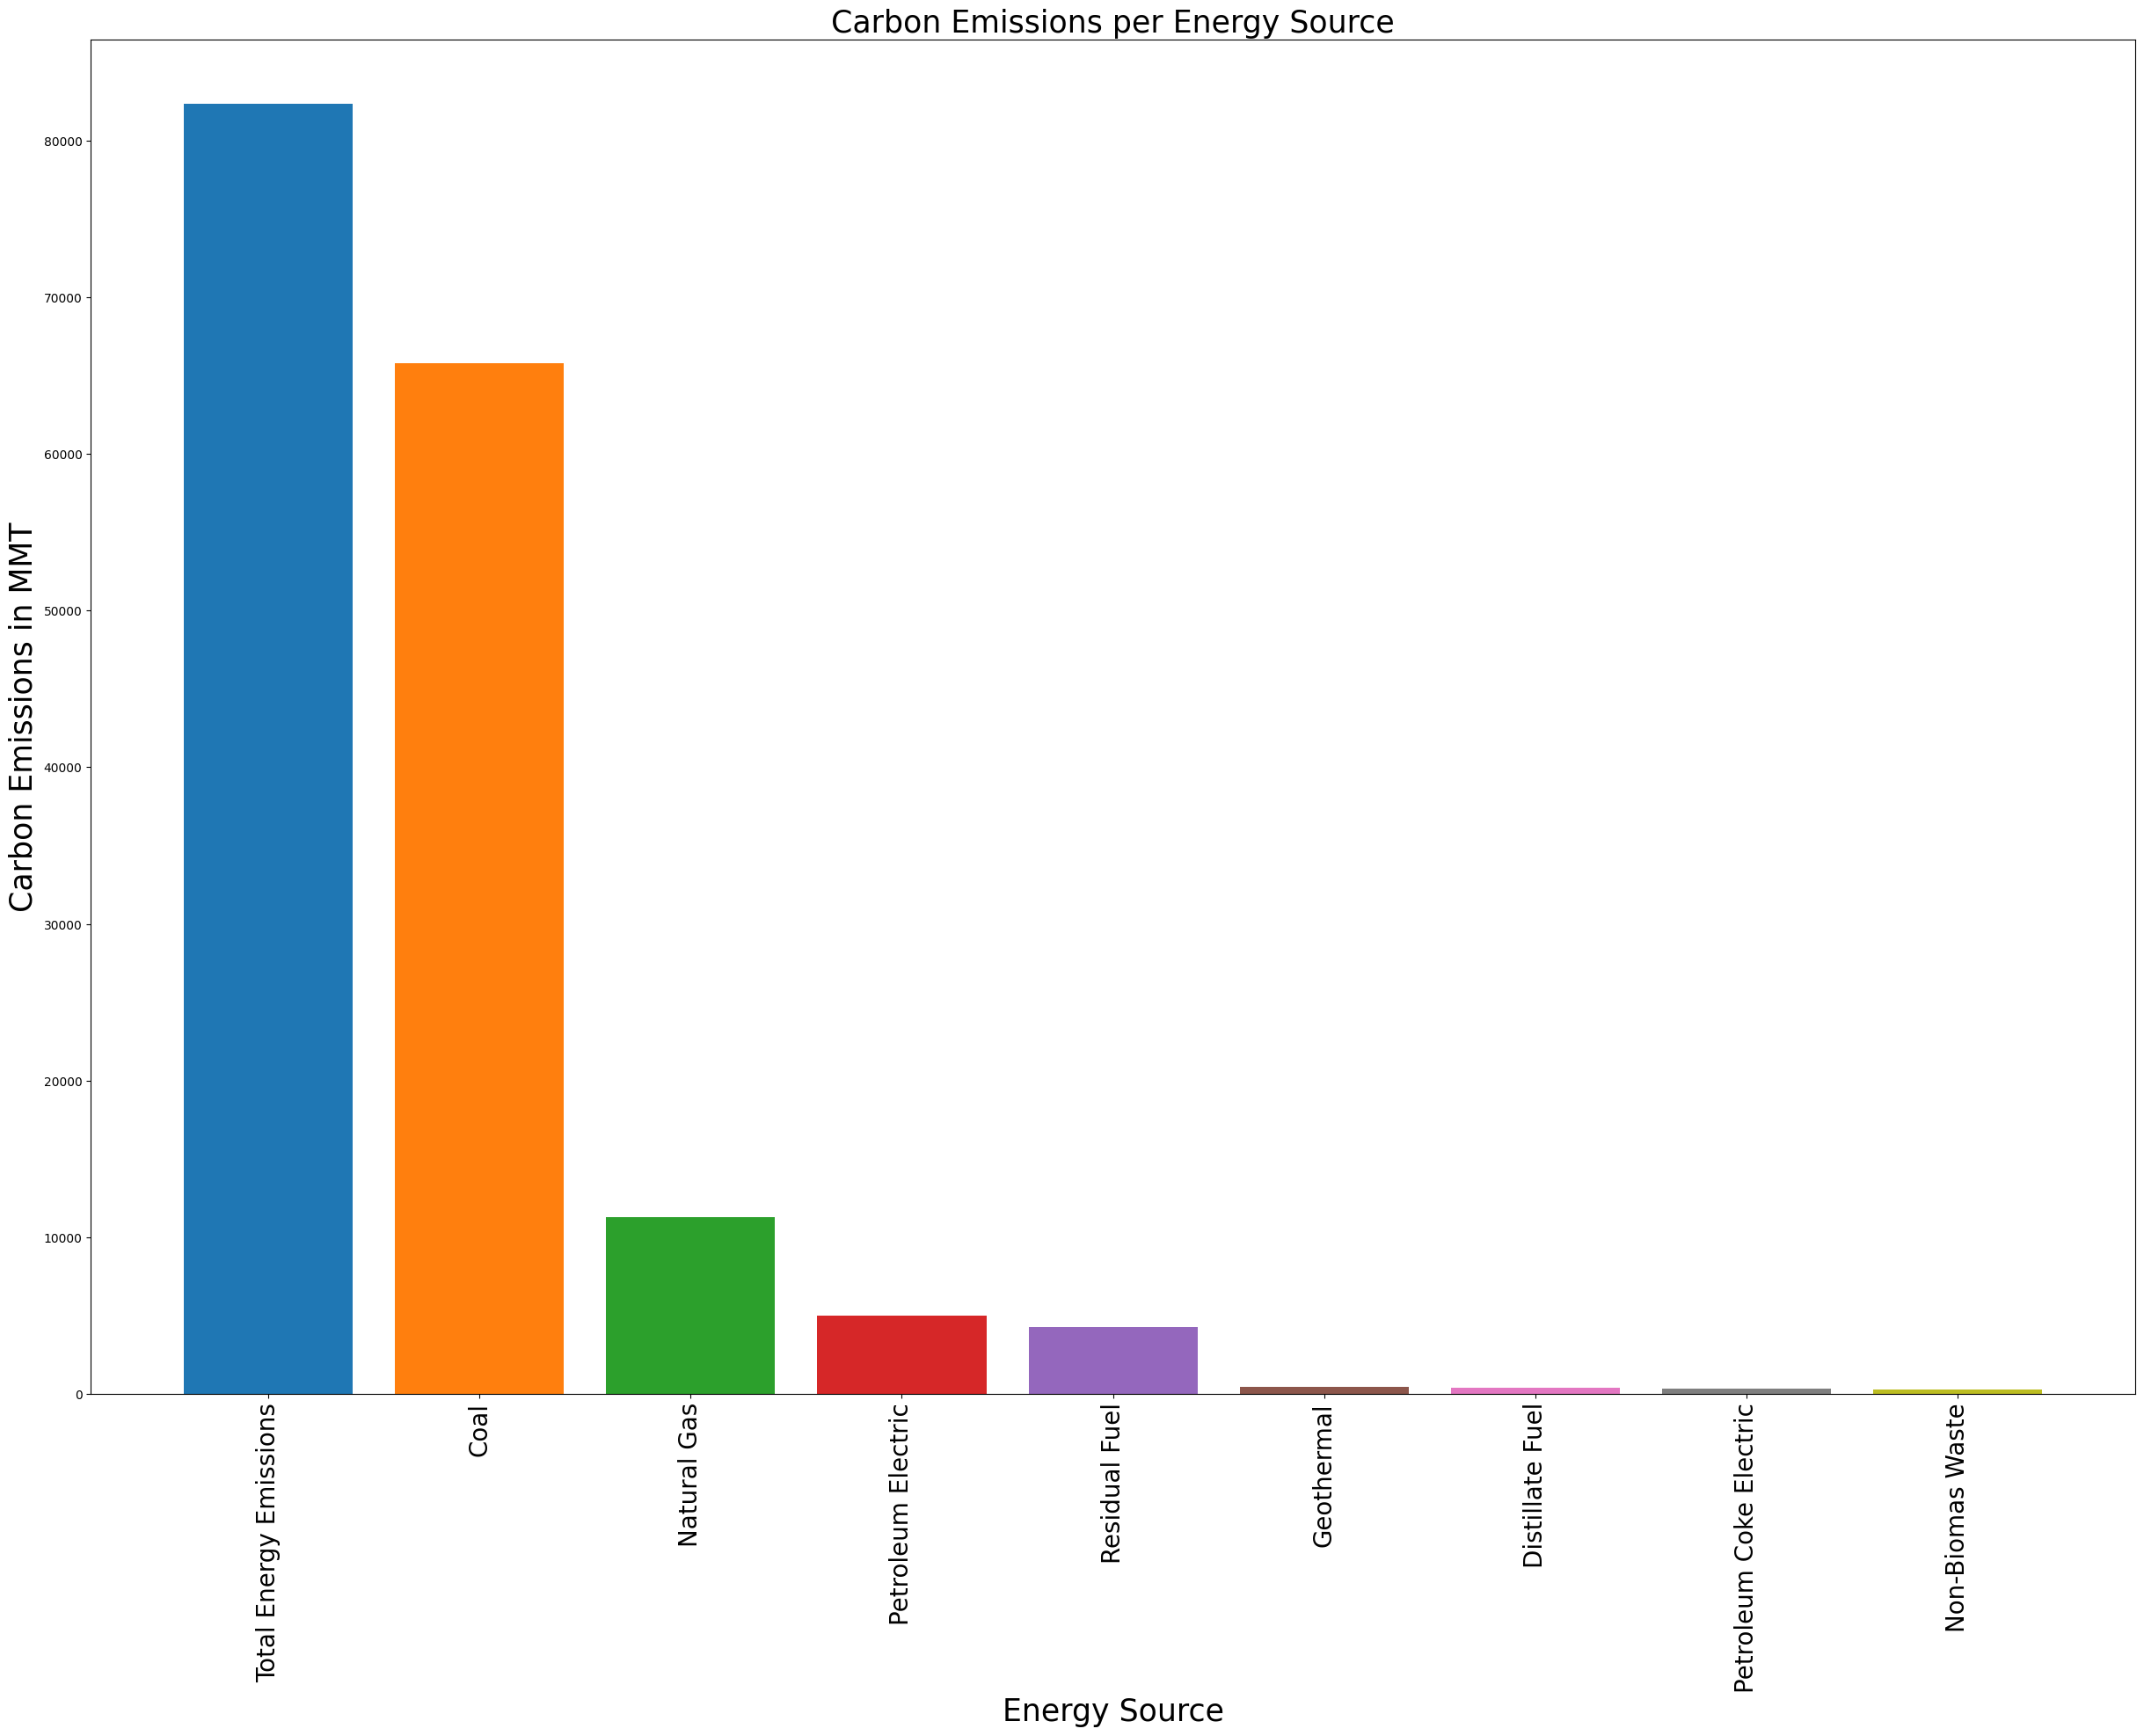

In [78]:
import matplotlib.colors as mcolors

# Sort the data by values in descending order
co2_per_source_sorted = co2_per_source.sort_values(ascending=False)

# Generate a list of colors
colors = list(mcolors.TABLEAU_COLORS.values())  # You can use TABLEAU_COLORS, CSS4_COLORS, or any custom list of colors

# Plot the sorted data with multiple colors
plt.figure(figsize=(30,20))
plt.bar(co2_per_source_sorted.index, co2_per_source_sorted.values, color=colors[:len(co2_per_source_sorted)])
plt.xlabel('Energy Source', fontsize=25)
plt.ylabel('Carbon Emissions in MMT', fontsize=25)
plt.title('Carbon Emissions per Energy Source', fontsize=25)
plt.xticks(rotation=90, fontsize=20)  # Rotate the labels for readability
plt.show()


From the bar chart, we can see that the contribution of coal to the total CO2 emission is significant followed by natural gas.

## **Natural gas - CO2 Emission Analysis**

In [79]:
emissions = ts_1.iloc[:,1:] #select all rows, excudes first column(0 th column MSN)
emissions.head()


Value  Column_Order                               Description  \
YYYYMM                                                                       
1973-01-01  72.076             1  Coal Electric Power Sector CO2 Emissions   
1973-02-01  64.442             1  Coal Electric Power Sector CO2 Emissions   
1973-03-01  64.084             1  Coal Electric Power Sector CO2 Emissions   
1973-04-01  60.842             1  Coal Electric Power Sector CO2 Emissions   
1973-05-01  61.798             1  Coal Electric Power Sector CO2 Emissions   

                                             Unit  
YYYYMM                                             
1973-01-01  Million Metric Tons of Carbon Dioxide  
1973-02-01  Million Metric Tons of Carbon Dioxide  
1973-03-01  Million Metric Tons of Carbon Dioxide  
1973-04-01  Million Metric Tons of Carbon Dioxide  
1973-05-01  Million Metric Tons of Carbon Dioxide

group and aggregate carbon emissions data based on energy sources (Descriptions) over a monthly frequency.

In [80]:

emissions= emissions.groupby(['Description', pd.Grouper(freq='M')])['Value'].sum().unstack(level = 0)
emissions.head(50)

Description  Coal Electric Power Sector CO2 Emissions  \
YYYYMM                                                  
1973-01-31                                     72.076   
1973-02-28                                     64.442   
1973-03-31                                     64.084   
1973-04-30                                     60.842   
1973-05-31                                     61.798   
1973-06-30                                     66.538   
1973-07-31                                     72.626   
1973-08-31                                     75.181   
1973-09-30                                     68.397   
1973-10-31                                     67.668   
1973-11-30                                     67.021   
1973-12-31                                     71.118   
1974-01-31                                     70.550   
1974-02-28                                     62.929   
1974-03-31                                     64.519   
1974-04-30                                     60.544   
1974-05-31                                     64.687   
1974-06-30                                     64.736   
1974-07-31                                     73.698   
1974-08-31                                     72.559   
1974-09-30                                     63.221   
1974-10-31                                     65.418   
1974-11-30                                     65.593   
1974-12-31                                     71.677   
1975-01-31                                     72.708   
1975-02-28                                     65.117   
1975-03-31                                     66.532   
1975-04-30                                     61.975   
1975-05-31                                     62.031   
1975-06-30                                     67.875   
1975-07-31                                     74.184   
1975-08-31                                     77.029   
1975-09-30                                     66.156   
1975-10-31                                     66.651   
1975-11-30                                     67.625   
1975-12-31                                     75.857   
1976-01-31                                     81.264   
1976-02-29                                     71.058   
1976-03-31                                     73.361   
1976-04-30                                     68.703   
1976-05-31                                     68.985   
1976-06-30                                     73.936   
1976-07-31                                     80.968   
1976-08-31                                     81.962   
1976-09-30                                     72.950   
1976-10-31                                     74.746   
1976-11-30                                     78.924   
1976-12-31                                     84.490   
1977-01-31                                     87.215   
1977-02-28                                     75.943   

Description  Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions  \
YYYYMM                                                                                                    
1973-01-31                                               2.375                                            
1973-02-28                                               2.061                                            
1973-03-31                                               1.171                                            
1973-04-30                                               1.022                                            
1973-05-31                                               0.949                                            
1973-06-30                                               1.787                                            
1973-07-31                                               1.965                                            
1973-08-31                                               2.536          

In [81]:
#Total Monthly Emissions
tme=emissions['Natural Gas Electric Power Sector CO2 Emissions']
tme.head()

YYYYMM
1973-01-31    12.175
1973-02-28    11.708
1973-03-31    13.994
1973-04-30    14.627
1973-05-31    17.344
Freq: ME, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

# **Testing Stationarity**

In [82]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

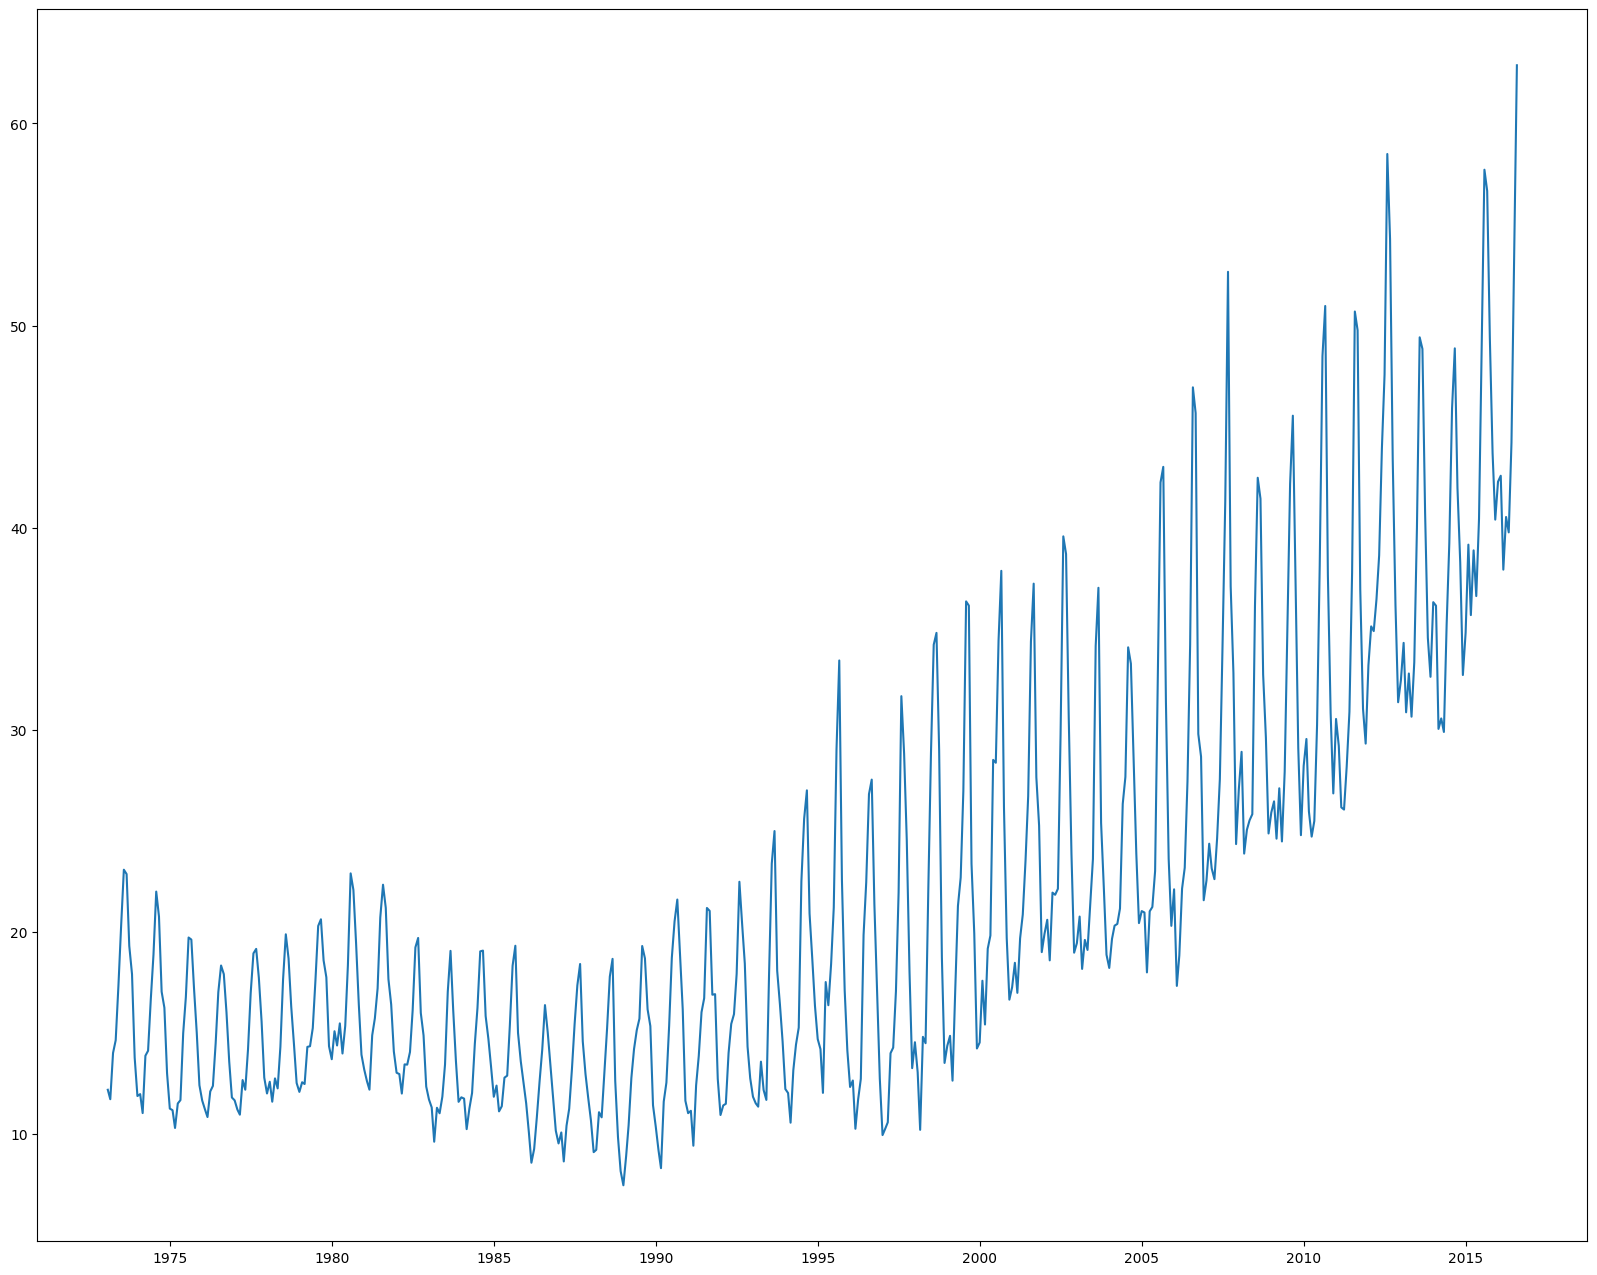

In [83]:
plt.plot(tme)

The figures clearly indicate a trend in the CO2 emission dataset, accompanied by seasonal variations. Therefore, we can conclude that the dataset is not stationary.

# **Dickey-Fuller Test**

In [84]:
def teststationarity(ts):
    rol_mean = pd.Series.rolling(ts, window=12).mean()
    rol_std = pd.Series.rolling(ts, window=12).std()

    plt.plot(ts, color='blue', label='Original')
    plt.plot(rol_mean, color='red', label='Rolling Mean')
    plt.plot(rol_std, color='black', label='Rolling Std')

    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)

    plt.xlabel('Time in Years', fontsize=25)
    plt.ylabel('CO2 Emissions', fontsize=25)
    plt.legend(loc='best',fontsize=25)
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

In [85]:
def adftest(ts):
    adftest = adfuller(ts, autolag='AIC')
    adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in adftest[4].items():
        adfoutput['Critical Value (%s)'%key] = value
    print(adfoutput)

    if adftest[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


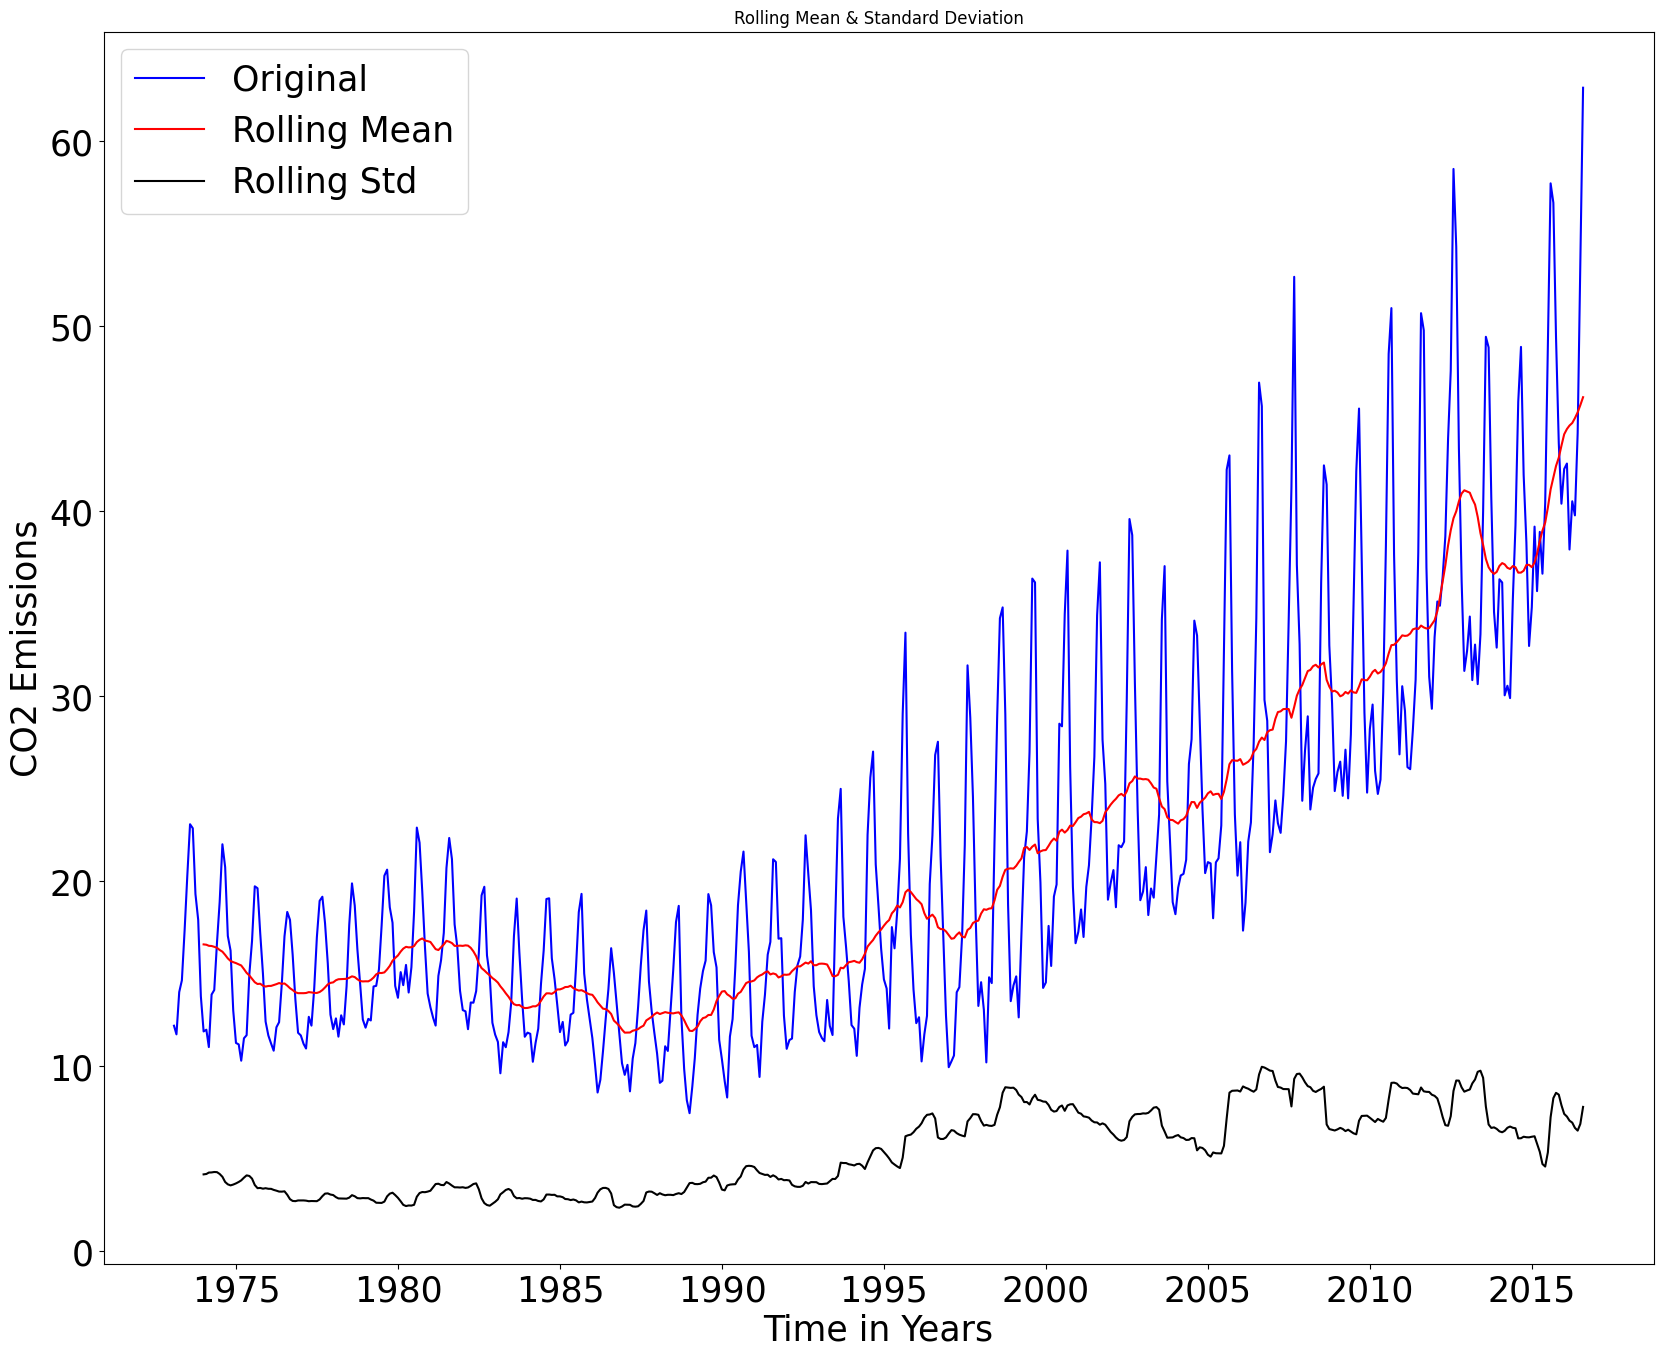

In [86]:
teststationarity(tme)

In [87]:
adftest(tme)

Test Statistic                   1.831215
p-value                          0.998409
#Lags Used                      19.000000
Number of Observations Used    503.000000
Critical Value (1%)             -3.443418
Critical Value (5%)             -2.867303
Critical Value (10%)            -2.569840
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


The mean emissions and the variation in standard deviation (represented by the black line) exhibit significant changes over time, indicating the presence of a trend. As a result, the series is not stationary. Furthermore, the test statistic exceeds the critical values at the 90%, 95%, and 99% confidence levels, providing no evidence to reject the null hypothesis. Consequently, we conclude that the series is nonstationary.

# **Transformation to stationary - Moving Average**

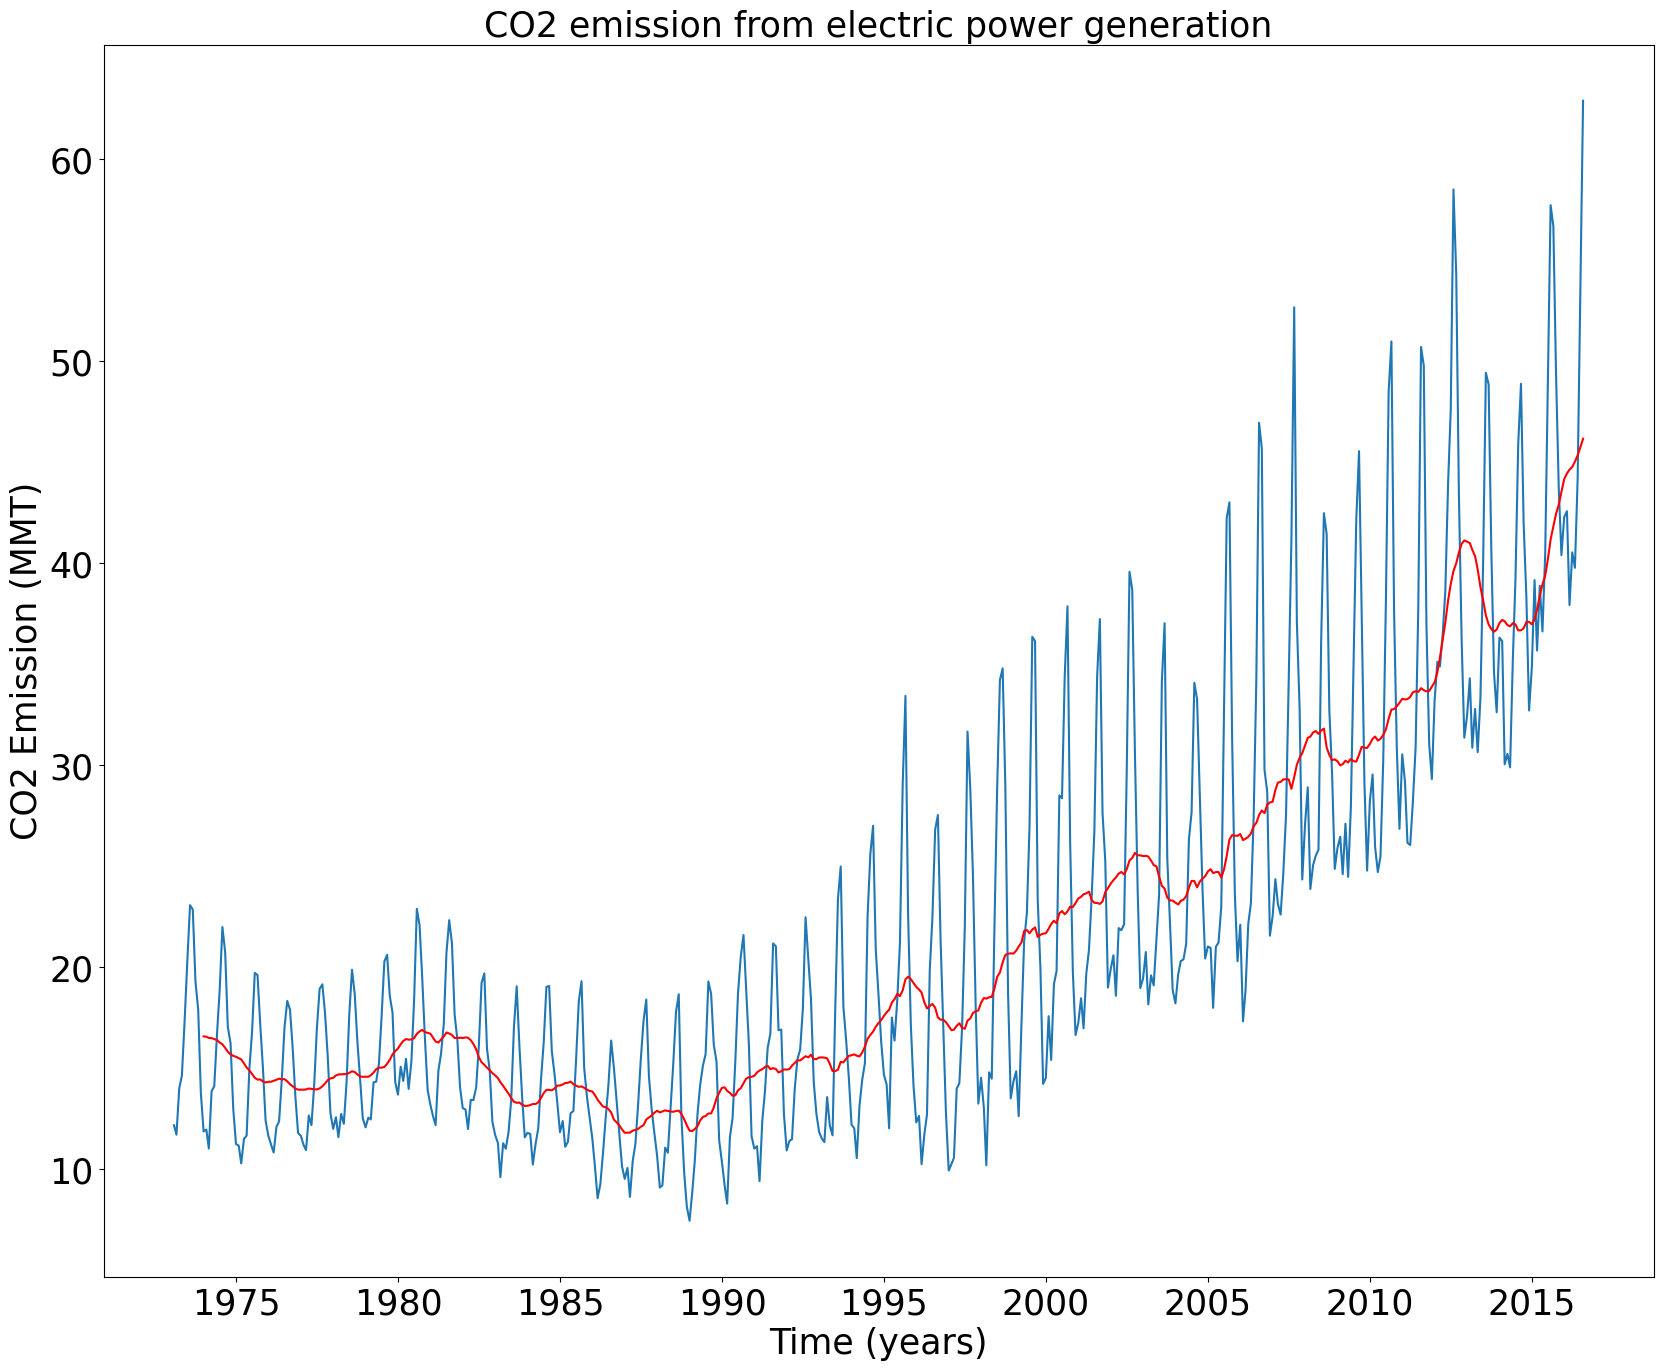

In [88]:
moving_avg = tme.rolling(12).mean()
plt.plot(tme)
plt.plot(moving_avg, color='red')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('Time (years)', fontsize = 25)
plt.ylabel('CO2 Emission (MMT)', fontsize = 25)
plt.title('CO2 emission from electric power generation', fontsize = 25)
plt.show()

In [89]:
tme_moving_avg_diff = tme - moving_avg
tme_moving_avg_diff.head(13)

YYYYMM
1973-01-31         NaN
1973-02-28         NaN
1973-03-31         NaN
1973-04-30         NaN
1973-05-31         NaN
1973-06-30         NaN
1973-07-31         NaN
1973-08-31         NaN
1973-09-30         NaN
1973-10-31         NaN
1973-11-30         NaN
1973-12-31   -4.705333
1974-01-31   -4.594333
Freq: ME, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

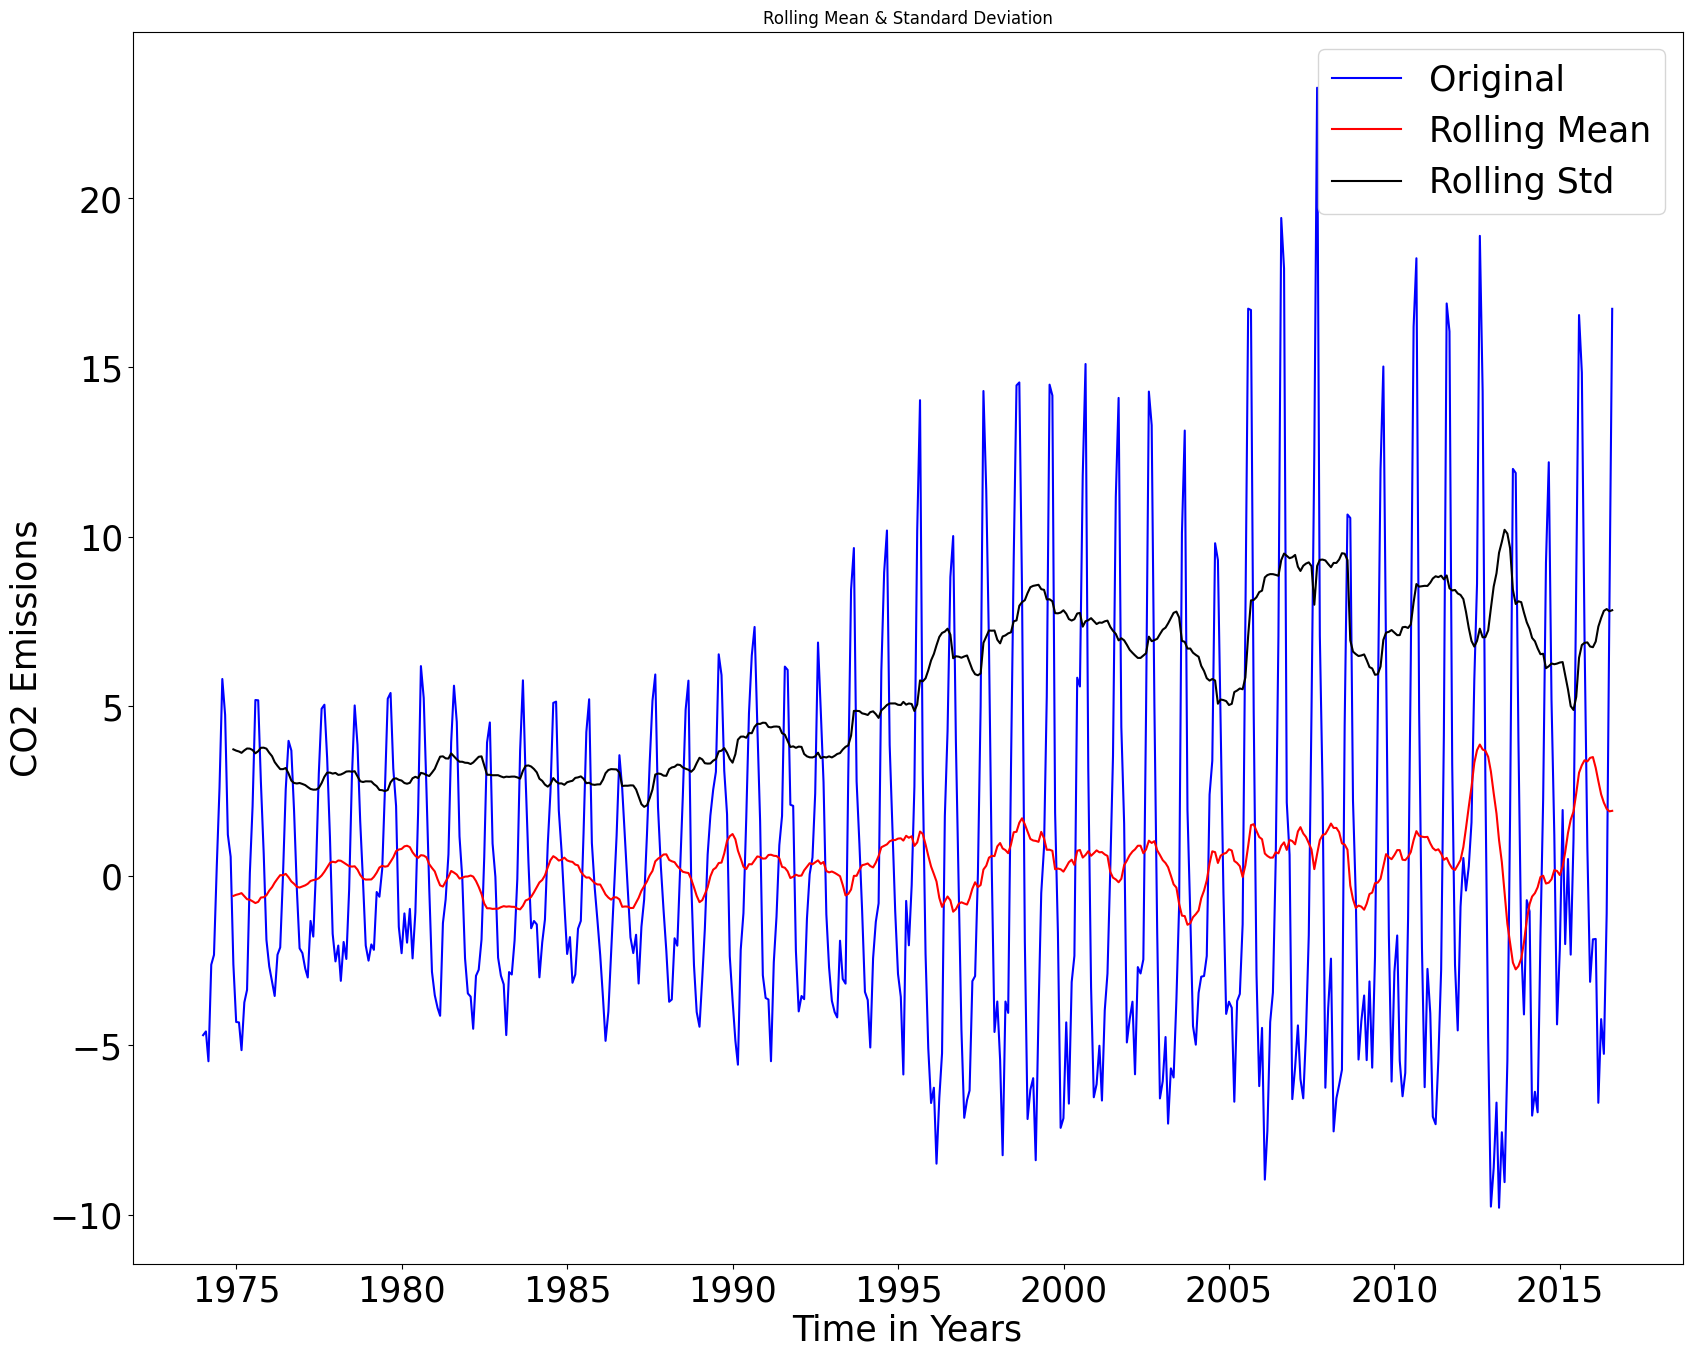

In [90]:
tme_moving_avg_diff.dropna(inplace=True)
teststationarity(tme_moving_avg_diff)

In [91]:
adftest(tme_moving_avg_diff)

Test Statistic                  -5.138977
p-value                          0.000012
#Lags Used                      19.000000
Number of Observations Used    492.000000
Critical Value (1%)             -3.443711
Critical Value (5%)             -2.867432
Critical Value (10%)            -2.569908
dtype: float64
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


The rolling mean values show slight variations, but the test statistic is smaller than the critical values at the 10%, 5%, and 1% levels. Therefore, we can confidently conclude, with 99% confidence, that the dataset is stationary.

# **Differencing**


One of the most common methods for addressing both trend and seasonality is differencing. This technique involves calculating the difference between the original observation at a particular time and the observation at the previous time.

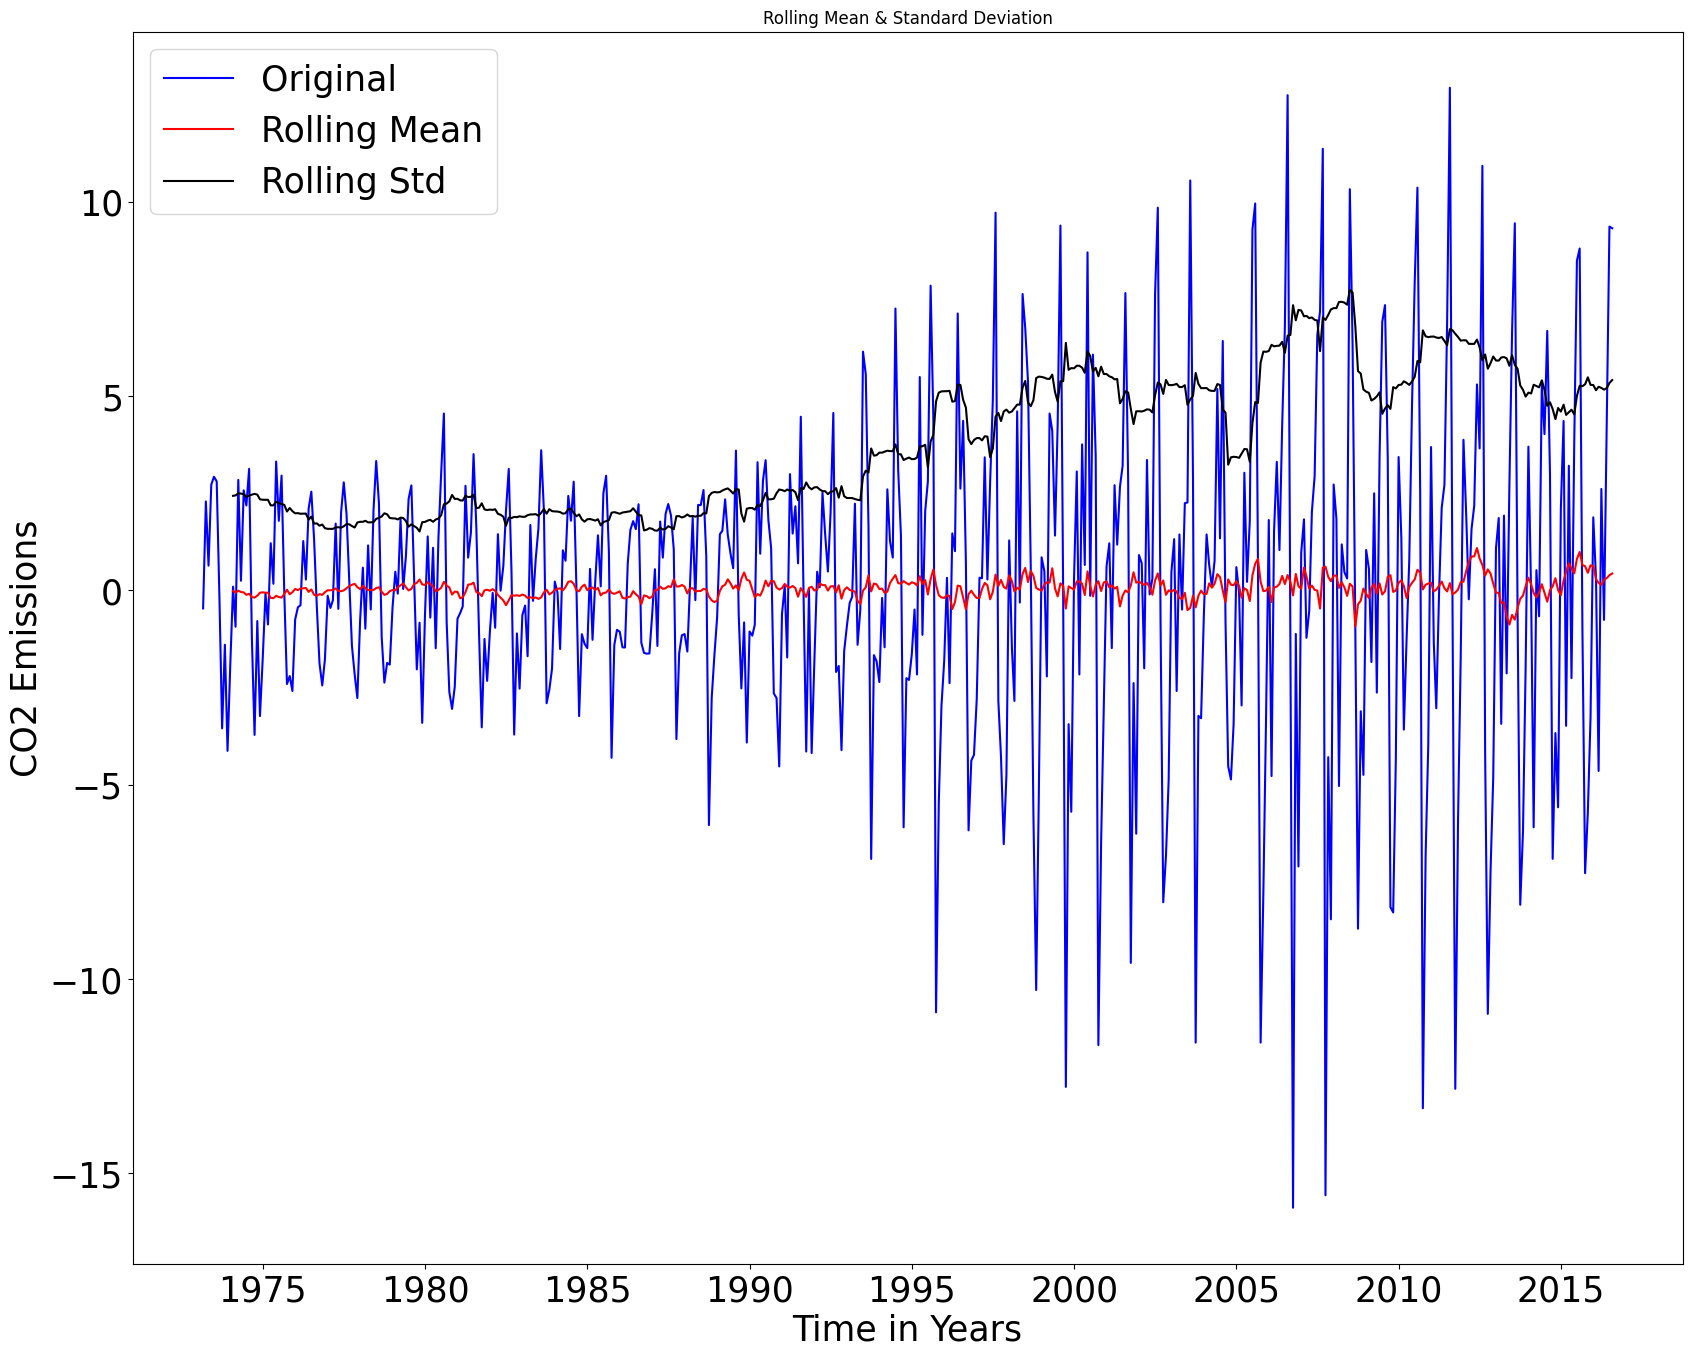

In [92]:
tme_first_difference = tme - tme.shift(1)
teststationarity(tme_first_difference.dropna(inplace=False))

In [93]:
adftest(tme_first_difference.dropna(inplace=False))

Test Statistic                  -5.435116
p-value                          0.000003
#Lags Used                      18.000000
Number of Observations Used    503.000000
Critical Value (1%)             -3.443418
Critical Value (5%)             -2.867303
Critical Value (10%)            -2.569840
dtype: float64
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


The first difference significantly enhances the stationarity of the series. To further address seasonality in the data, we can apply seasonal differencing. This involves subtracting the observation from the same period in the previous season.

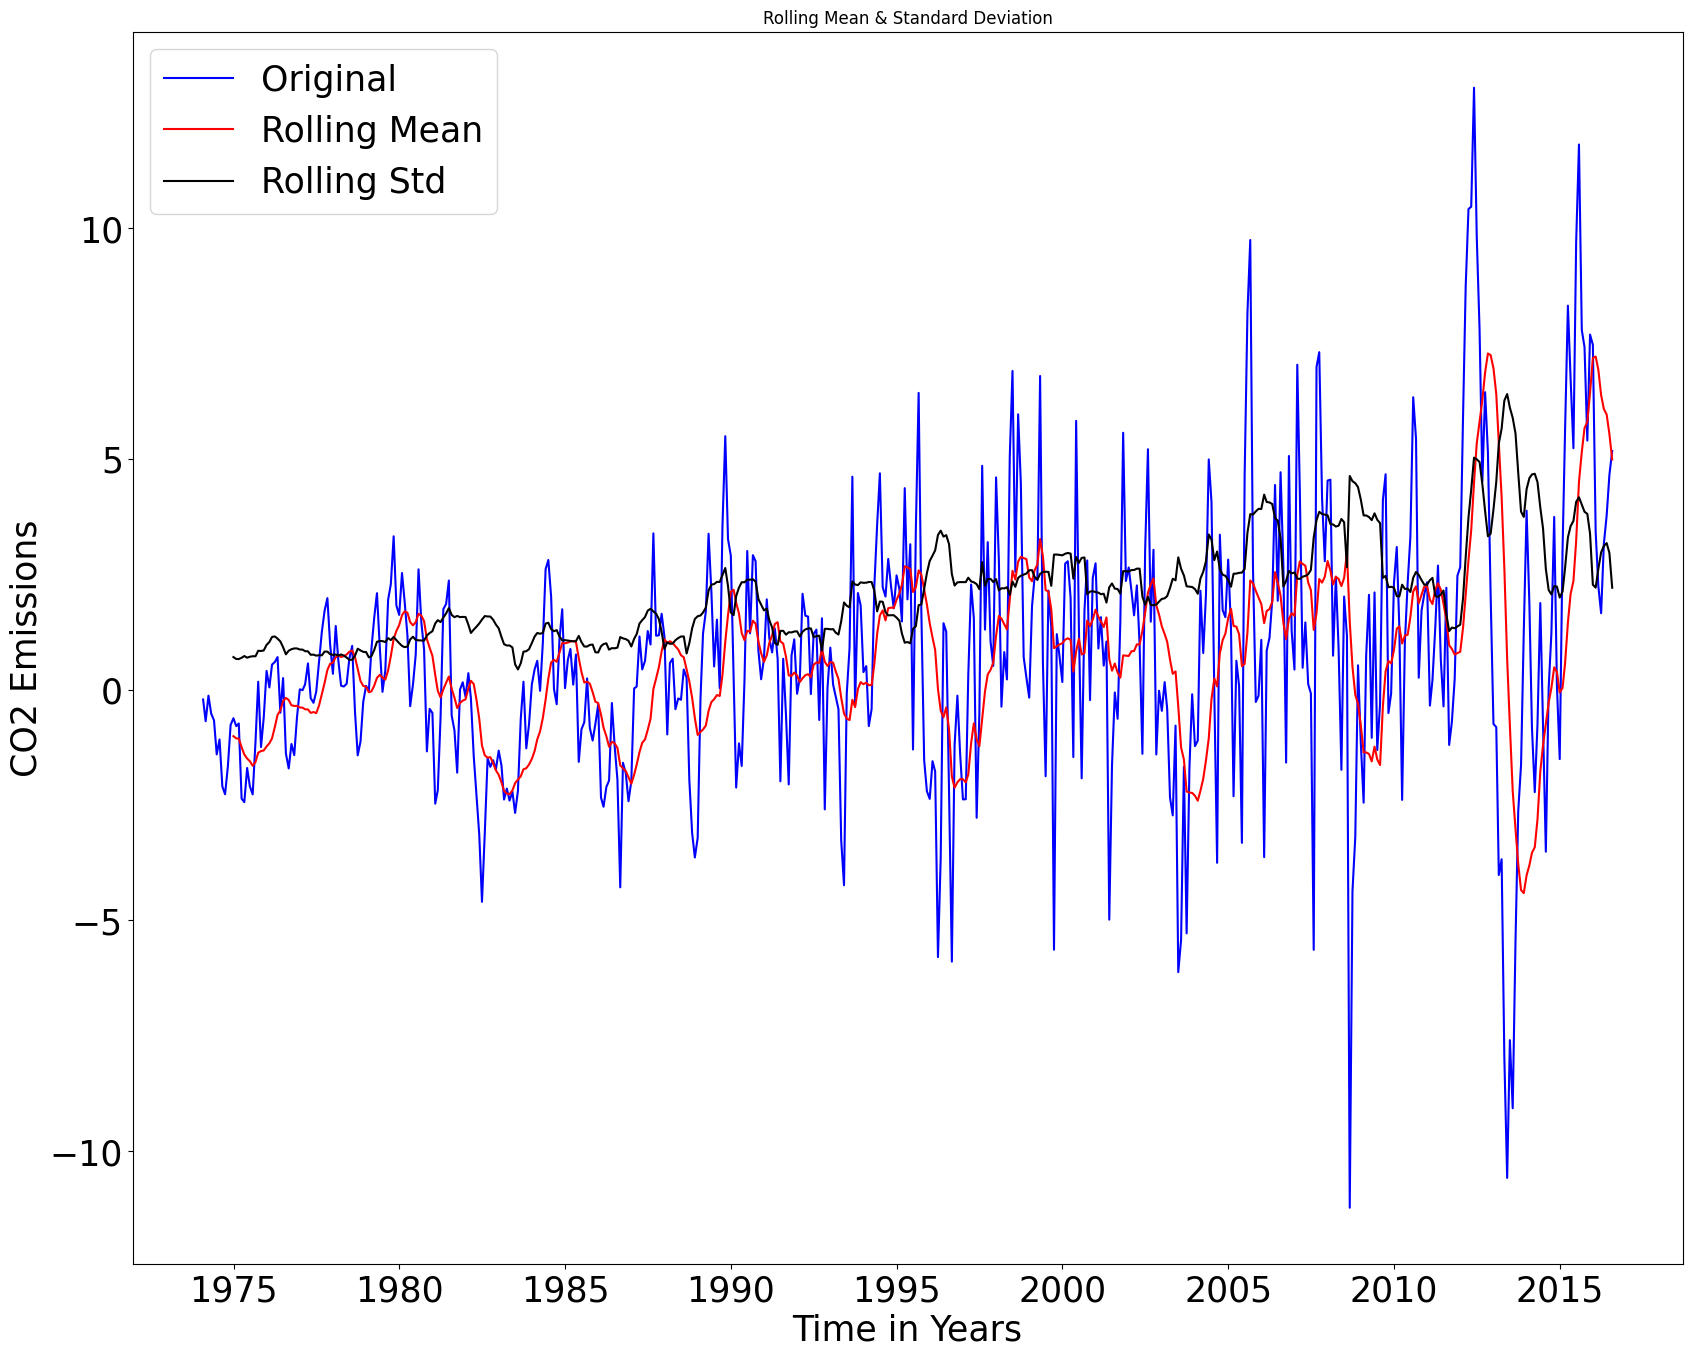

Test Statistic                  -4.412396
p-value                          0.000282
#Lags Used                      13.000000
Number of Observations Used    497.000000
Critical Value (1%)             -3.443576
Critical Value (5%)             -2.867373
Critical Value (10%)            -2.569877
dtype: float64
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [94]:
tme_seasonal_difference = tme - tme.shift(12)
teststationarity(tme_seasonal_difference.dropna(inplace=False))
adftest(tme_seasonal_difference.dropna(inplace=False))

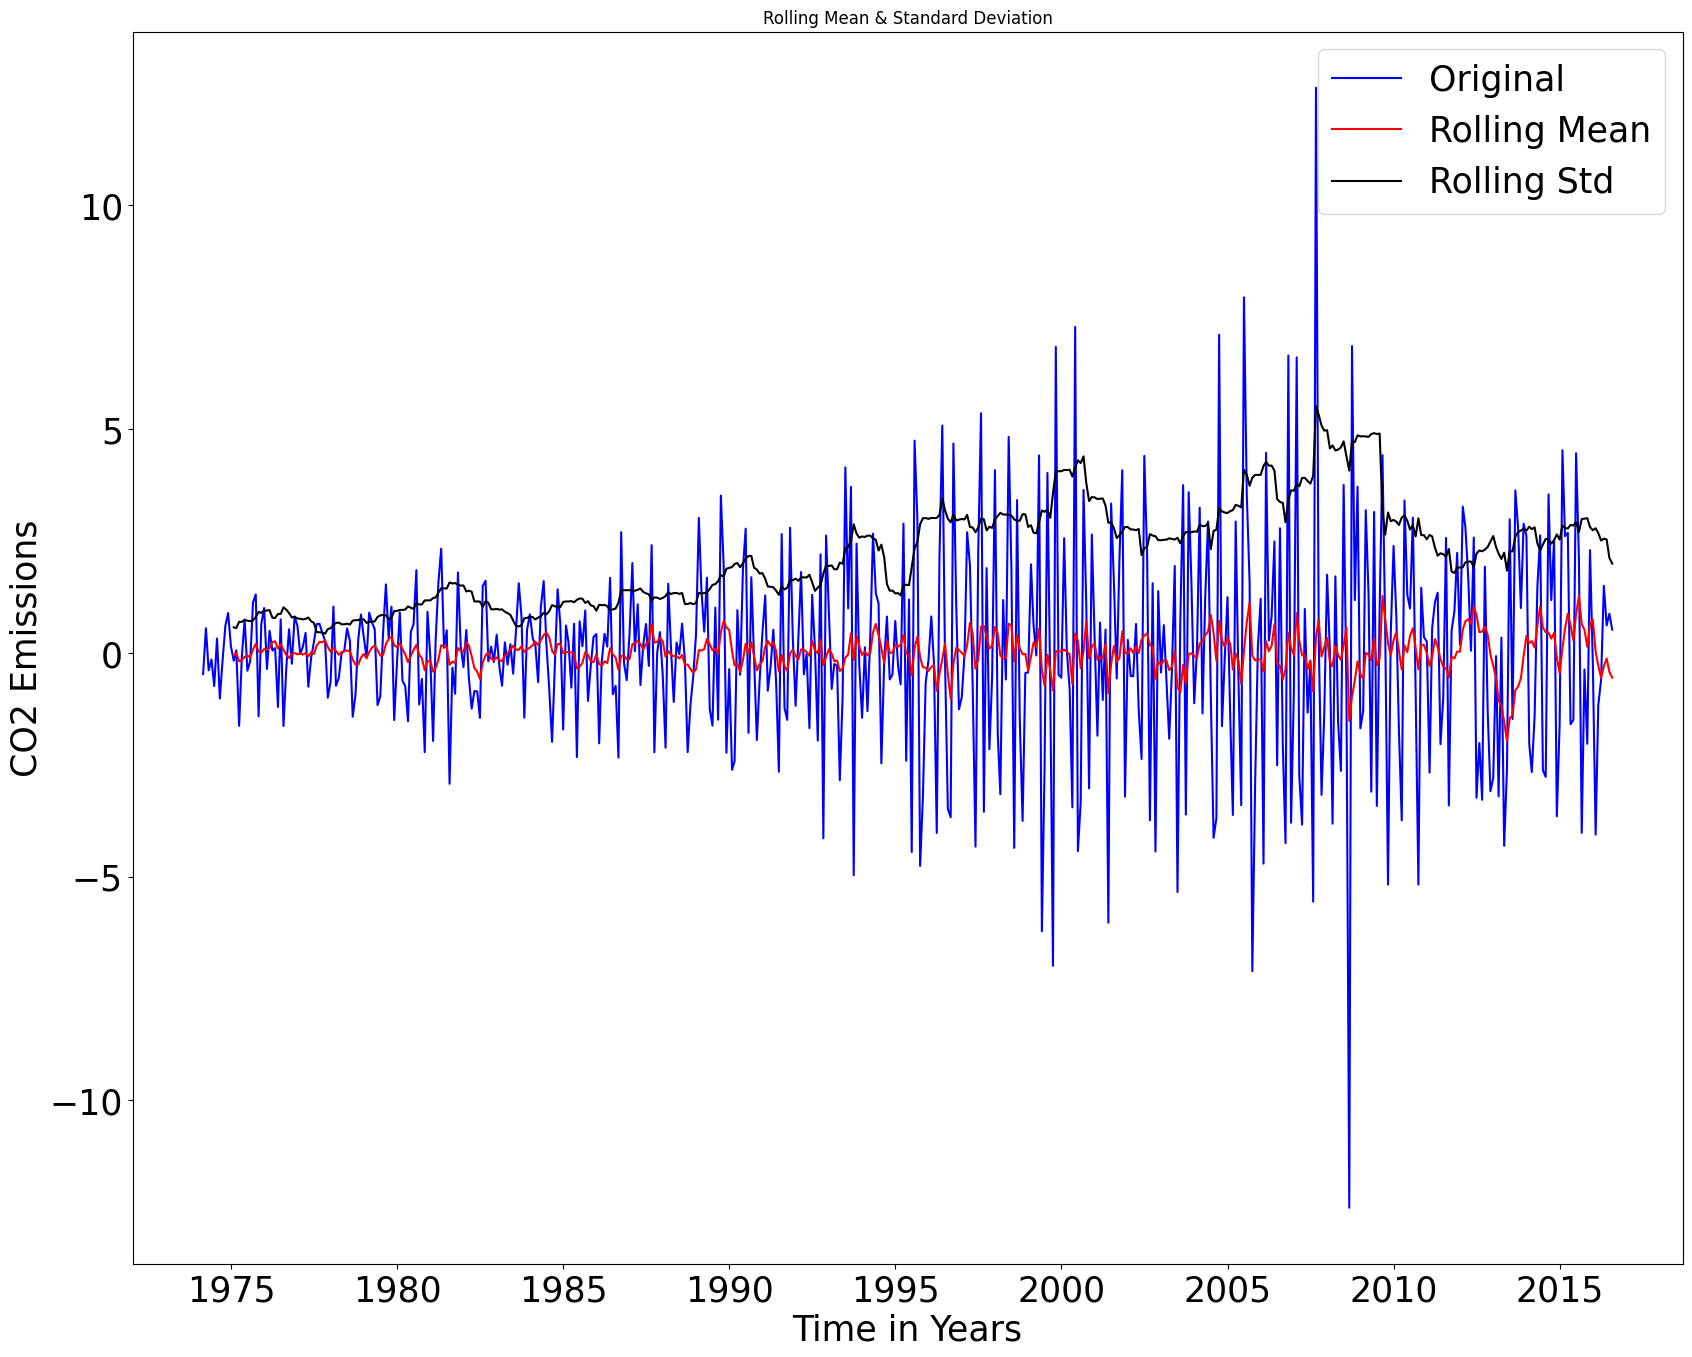

Test Statistic                -1.009743e+01
p-value                        1.081539e-17
#Lags Used                     1.200000e+01
Number of Observations Used    4.970000e+02
Critical Value (1%)           -3.443576e+00
Critical Value (5%)           -2.867373e+00
Critical Value (10%)          -2.569877e+00
dtype: float64
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [95]:
tme_seasonal_first_difference = tme_first_difference - tme_first_difference.shift(12)
teststationarity(tme_seasonal_first_difference.dropna(inplace=False))
adftest(tme_seasonal_first_difference.dropna(inplace=False))

Upon examining the test statistic and the p-value, we can conclude that applying seasonal first differencing has rendered the time series dataset stationary. While this differencing procedure can also be applied to the log-transformed values, it did not enhance the stationarity of the dataset further. This indicates that the seasonal differencing approach was sufficient to stabilize the series without the need for logarithmic transformation.

# **BUILDING SARIMA**

## Plotting ACF and PACF

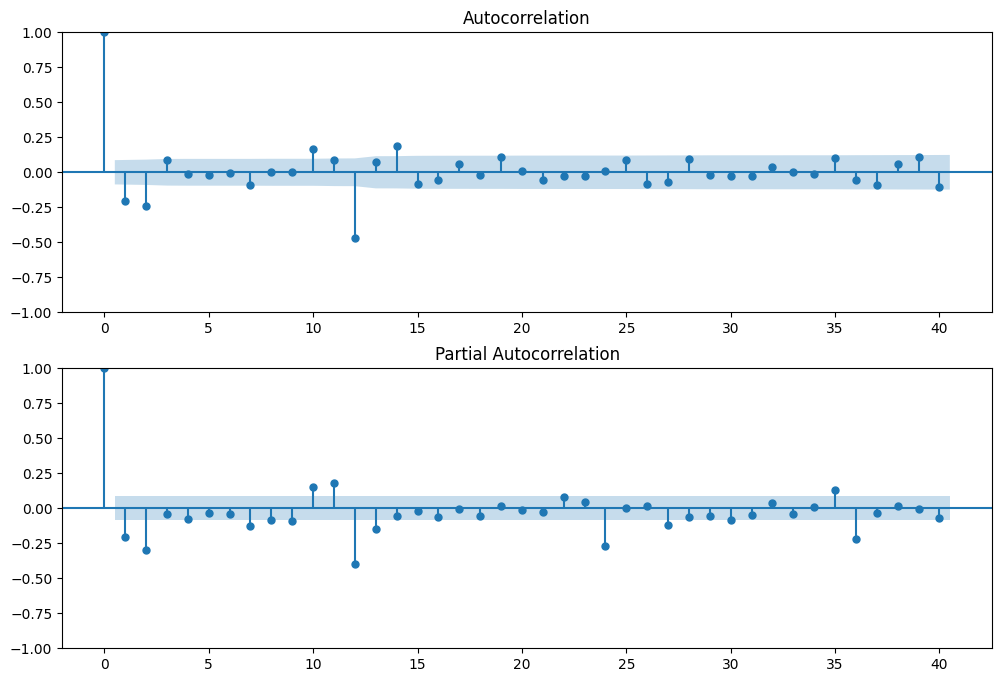

In [96]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(tme_seasonal_first_difference.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(tme_seasonal_first_difference.iloc[13:], lags=40, ax=ax2)

In [97]:
p = d = q = range(0, 2) # Define the p, d and q parameters to take any value between 0 and 2
pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets
pdq_x_QDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] # Generate all different combinations of seasonal p, q and q triplets
print('Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], pdq_x_QDQs[1]))
print('SARIMAX: {} x {}'.format(pdq[2], pdq_x_QDQs[2]))

Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)


In [98]:
print(pdq)
print(pdq_x_QDQs)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
[(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]


In [102]:
for param in pdq:
    for seasonal_param in pdq_x_QDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(tme,
                                            order=param,
                                            seasonal_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:4804.065995091218
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:4135.625648186424
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:2572.194757744371
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:2504.2095028358435
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:2544.1464266167964
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:2465.1472629963705
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:2511.043139693217
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:2505.840238070918
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:4157.561225515781
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:3572.105901714113
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:2334.724725408497
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:2245.507386420759
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:2329.0446013856376
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:2218.6800978144192
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:2262.062797989871
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:2247.5327721889257
ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:2932.1335743055997
ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:2616.0128108187673
ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:232

In [105]:
a=[]
b=[]
c=[]
wf=pd.DataFrame()

In [107]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in pdq_x_QDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(tme,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            a.append(param)
            b.append(param_seasonal)
            c.append(results.aic)
        except:
            continue
wf['pdq']=a
wf['pdq_x_QDQs']=b
wf['aic']=c
print(wf[wf['aic']==wf['aic'].min()])

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:4804.065995091218
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4135.625648186424
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2572.194757744371
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2504.2095028358435
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2544.1464266167964
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2465.1472629963705
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2511.043139693217
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2505.840238070918
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:4157.561225515781
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3572.105901714113
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2334.724725408497
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2245.507386420759
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2329.0446013856376
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2218.6800978144192
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2262.062797989871
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2247.5327721889257
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2932.1335743055997
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2616.0128108187673
AR

In [109]:
mod = sm.tsa.statespace.SARIMAX(tme,
                                order=(1,1,1),
                                seasonal_order=(0,1,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                              SARIMAX Results                                              
Dep. Variable:     Natural Gas Electric Power Sector CO2 Emissions   No. Observations:                  523
Model:                              SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -997.777
Date:                                             Thu, 03 Oct 2024   AIC                           2003.553
Time:                                                     15:36:22   BIC                           2020.380
Sample:                                                 01-31-1973   HQIC                          2010.158
                                                      - 07-31-2016                                         
Covariance Type:                                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

The coef column indicates the weight (i.e., importance) of each feature and its impact on the time series, while the P>|z| column provides the significance of each feature weight. Since each weight has a p-value close to 0, it is reasonable to include all features in our model.

When fitting seasonal ARIMA models, conducting model diagnostics is crucial to verify that none of the model's assumptions have been violated. Initially, we can examine a line plot of the residual errors, which suggests that some trend information may still be unaccounted for by the model. This indicates a potential need for further refinement to better capture the underlying patterns in the data.

<Axes: xlabel='YYYYMM'>

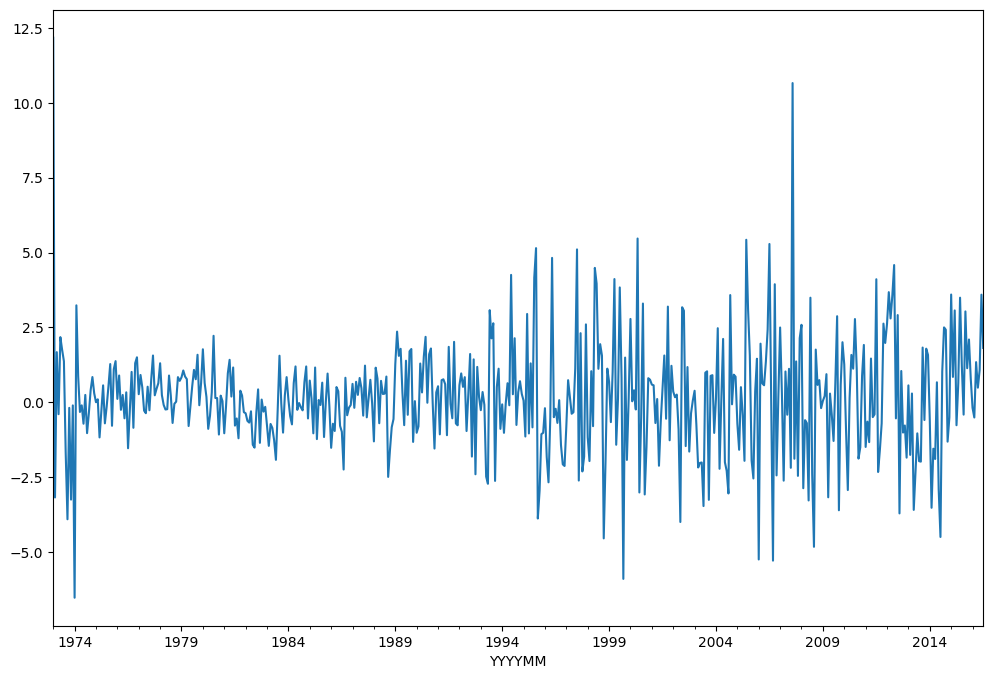

In [110]:
results.resid.plot(figsize=(12,8))

In [111]:
print(results.resid.describe())

count    523.000000
mean       0.144267
std        1.885626
min       -6.528424
25%       -0.791260
50%        0.126974
75%        1.040652
max       12.175000
dtype: float64


The figure illustrates the distribution of the residual errors, indicating a slight bias in the predictions. Following this, a density plot of the residual error values suggests that the errors follow a Gaussian distribution; however, they may not be centered around zero. This observation implies that while the residuals exhibit a normal distribution, adjustments may be needed to improve the accuracy of the predictions and ensure that the model captures the underlying data more effectively.

<Axes: ylabel='Density'>

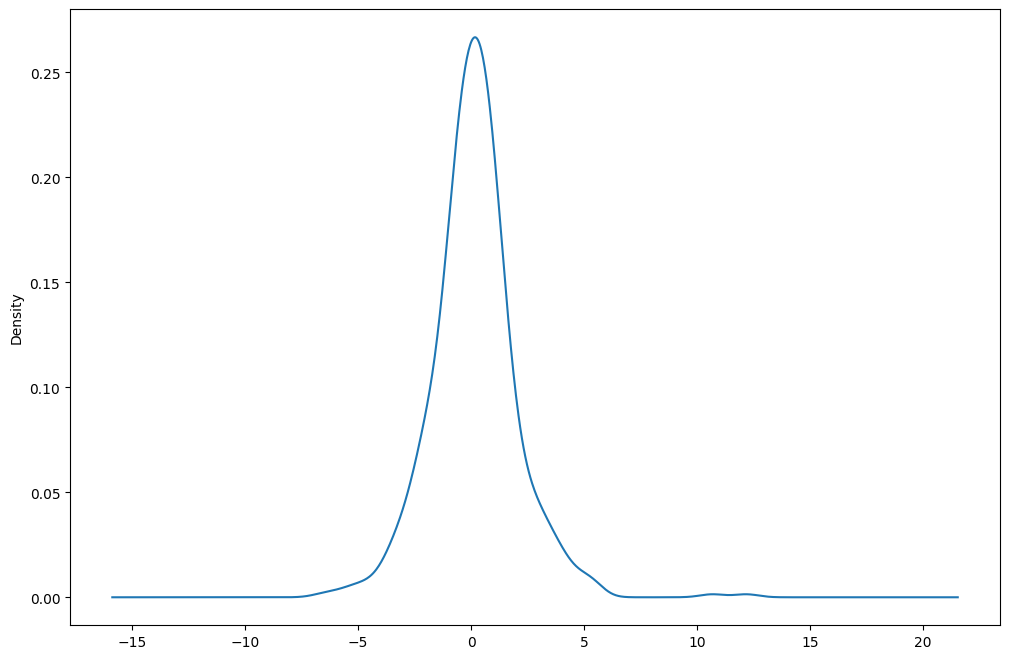

In [112]:
results.resid.plot(figsize=(12,8),kind='kde')

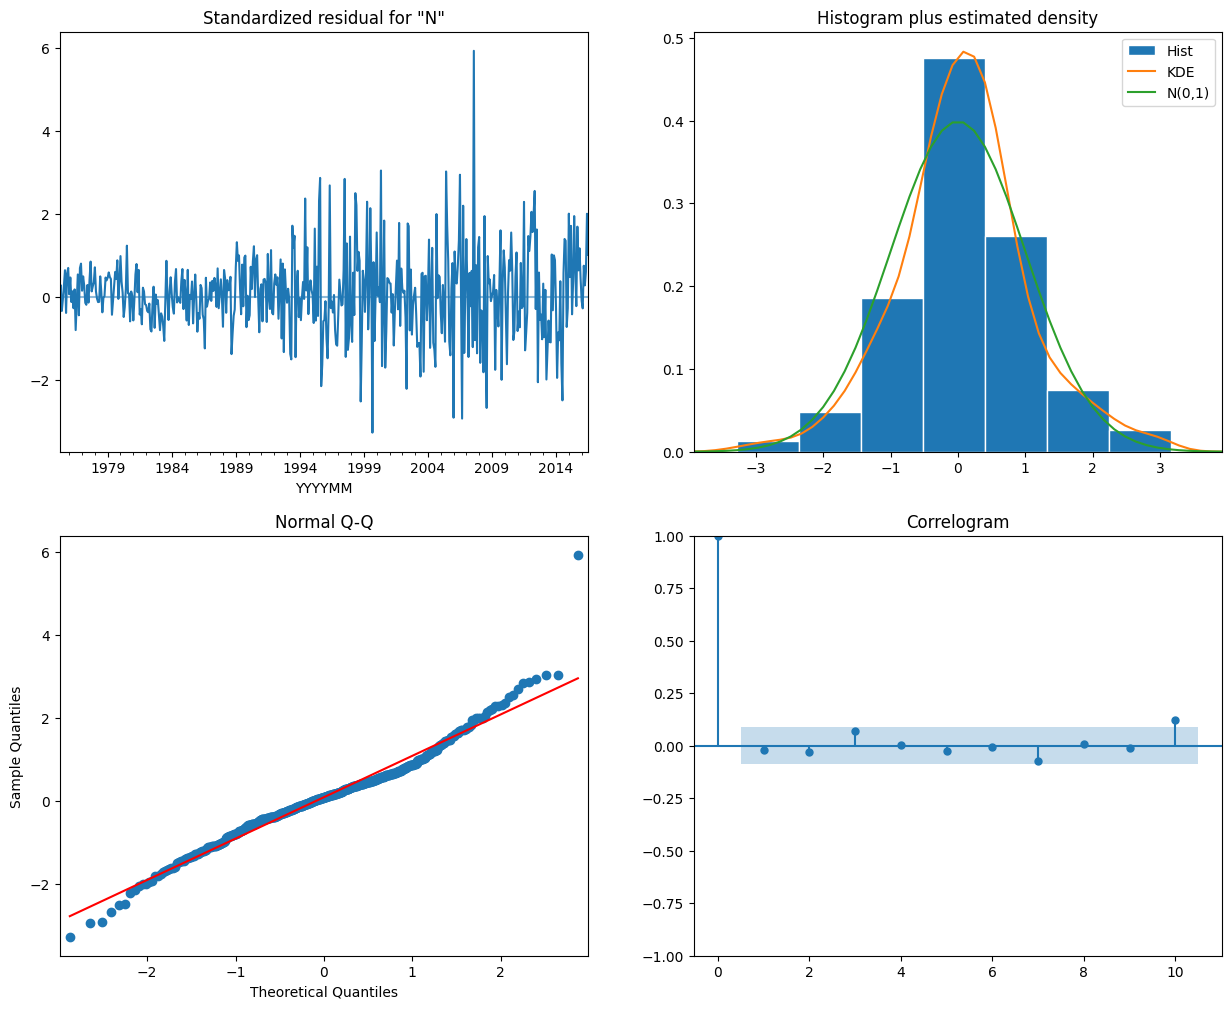

In [113]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

Our primary goal is to ensure that the residuals of our model are uncorrelated, normally distributed, and centered around zero. If the seasonal ARIMA model does not meet these criteria, it indicates potential areas for improvement.

The model diagnostics suggest that the residuals are normally distributed based on the following observations:

Top Right Plot: The red KDE line closely follows the
�
(
0
,
1
)
N(0,1) line, where
�
(
0
,
1
)
N(0,1) denotes a normal distribution with a mean of 0 and a standard deviation of 1. This alignment indicates that the residuals are likely normally distributed. Although the forecast errors deviate somewhat from the straight line, suggesting that the normal distribution is not a perfect fit, it remains a reasonable approximation.

Bottom Left QQ-Plot: The ordered distribution of residuals (represented by blue dots) aligns closely with the linear trend of samples drawn from a standard normal distribution. This further supports the notion that the residuals are normally distributed.

Top Left Plot: The residuals over time do not exhibit any apparent seasonality and appear to resemble white noise. This is corroborated by the autocorrelation plot (bottom right), which shows low correlation between the time series residuals and their lagged versions.

These observations lead us to conclude that our model provides a satisfactory fit, enabling us to better understand our time series data and make accurate forecasts of future values.

# **Performance of the Model**

In [114]:
pred = results.get_prediction(start = 480, end = 523, dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head()

lower Natural Gas Electric Power Sector CO2 Emissions  \
2013-01-31                                          30.203833       
2013-02-28                                          29.088378       
2013-03-31                                          28.958983       
2013-04-30                                          30.708072       
2013-05-31                                          32.104077       

            upper Natural Gas Electric Power Sector CO2 Emissions  
2013-01-31                                          37.257323      
2013-02-28                                          36.141868      
2013-03-31                                          36.012473      
2013-04-30                                          37.761562      
2013-05-31                                          39.157567


The dynamic=False argument ensures that we generate one-step-ahead forecasts, meaning that each forecast is derived using the complete history of the data up to that point.

To evaluate the model's performance, we can plot the actual and forecasted values of the CO2 emission time series. This visualization will help us assess the accuracy of the model's predictions and how well it captures the underlying trends and variations in the data. By comparing the real values against the forecasted values, we can gain insights into the model's effectiveness and identify any areas for potential improvement.

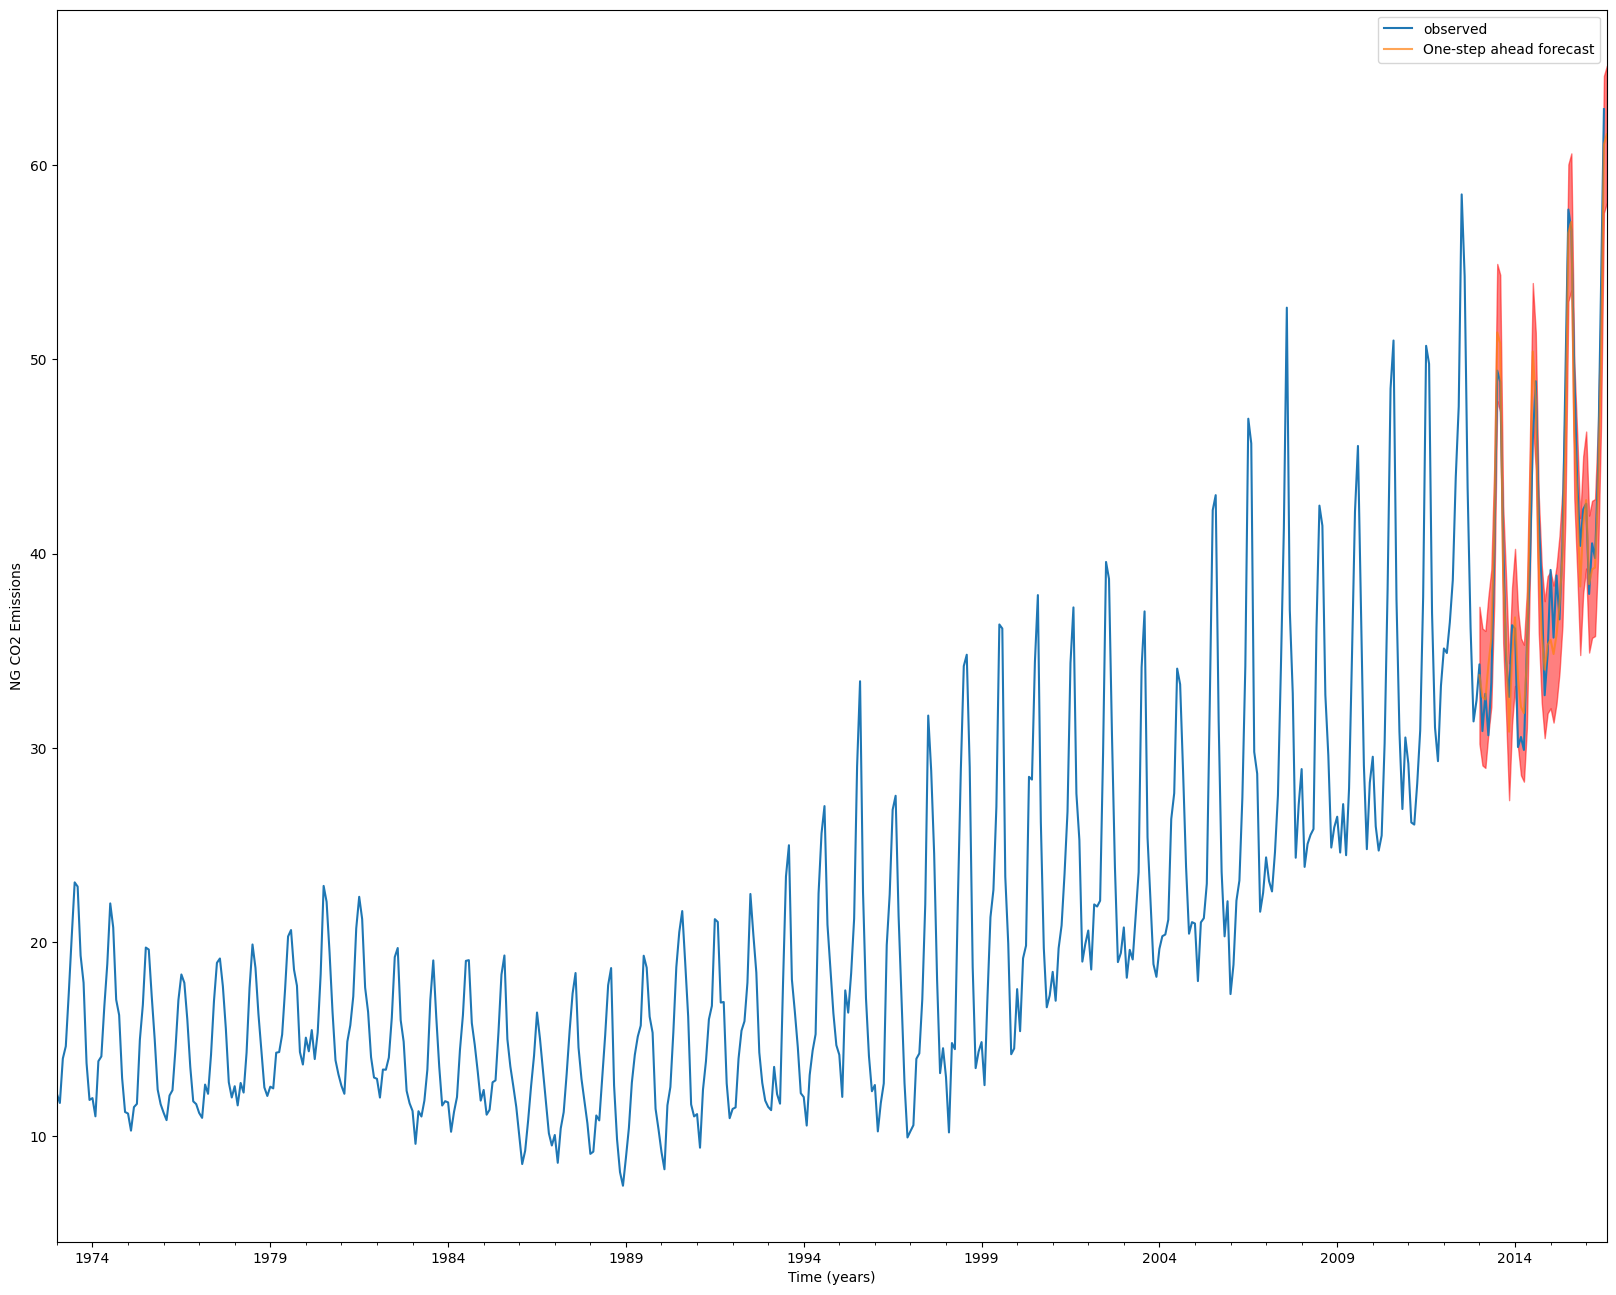

In [115]:
ax = tme['1973':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.5)

ax.set_xlabel('Time (years)')
ax.set_ylabel('NG CO2 Emissions')
plt.legend()

plt.show()

Overall, our forecasts align closely with the true values, demonstrating a similar behavior throughout the time series.

To quantify the accuracy of our forecasts, we will utilize the Mean Squared Error (MSE). This metric summarizes the average error of our predictions. For each predicted value, we compute its distance from the corresponding true value and then square the result. Squaring the differences ensures that positive and negative errors do not cancel each other out, allowing us to capture the magnitude of the errors effectively.

Calculating the MSE provides a clear indication of the model's forecasting accuracy and helps identify areas where the model may need refinement.

In [116]:
tme_forecast = pred.predicted_mean
tme_truth = tme['2013-01-31':]

# Compute the mean square error
mse = ((tme_forecast - tme_truth) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((tme_forecast-tme_truth)**2)/len(tme_forecast))))


The Mean Squared Error (MSE) of the forecast is 4.09
The Root Mean Square Error (RMSE) of the forcast: nan


In [118]:
tme_pred_concat = pd.concat([tme_truth, tme_forecast])

In [119]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2013-01-31'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

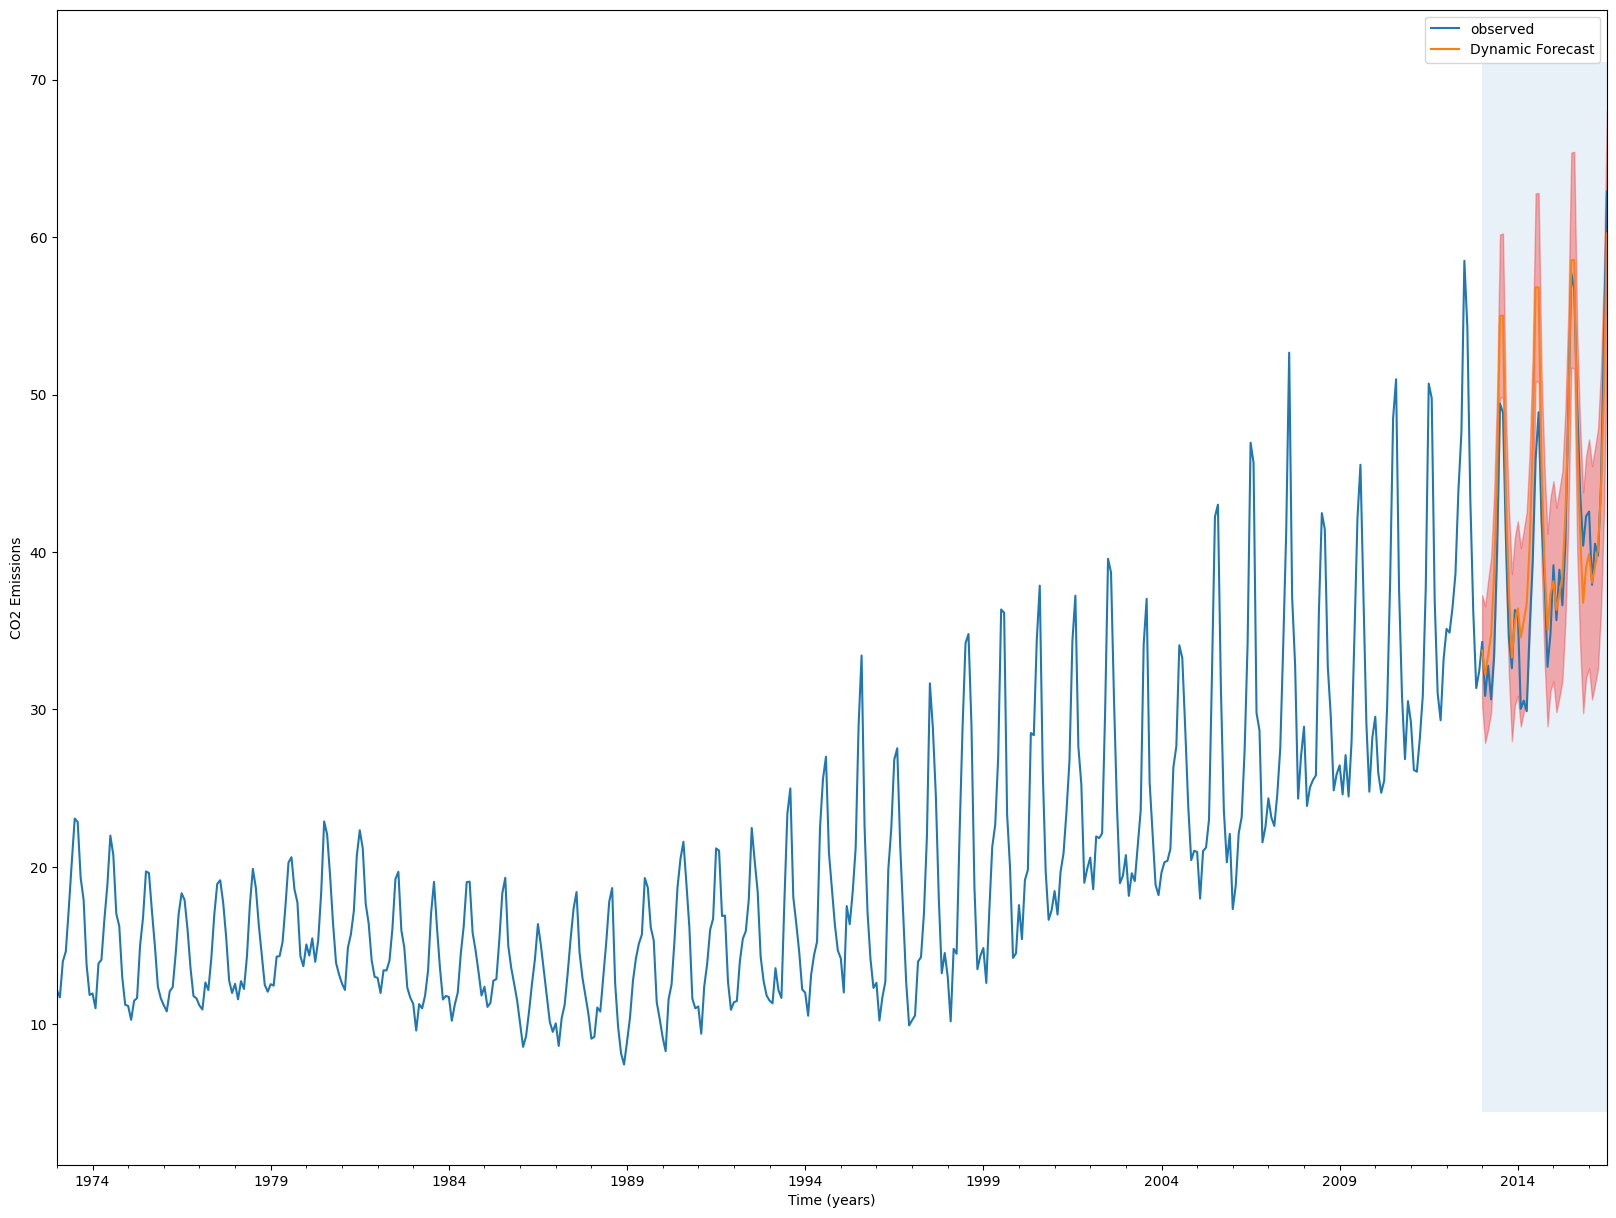

In [120]:
ax = tme['1973':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1],
                color='r',
                alpha=.3)

ax.fill_betweenx(ax.get_ylim(),
                 pd.to_datetime('2013-01-31'),
                 tme.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time (years)')
ax.set_ylabel('CO2 Emissions')

plt.legend()
plt.show()

In [121]:
# Extract the predicted and true values of our time series
tme_forecast = pred_dynamic.predicted_mean
tme_orginal = tme['2013-01-31':]

# Compute the mean square error
mse = ((tme_forecast - tme_orginal) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((tme_forecast-tme_orginal)**2)/len(tme_forecast))))

The Mean Squared Error (MSE) of the forecast is 14.39
The Root Mean Square Error (RMSE) of the forcast: 3.7936


# **Forecasting using the Model**

In [122]:
# Get forecast of 10 years or 120 months steps ahead in future
forecast = results.get_forecast(steps= 120)
# Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()
forecast_ci.head()

lower Natural Gas Electric Power Sector CO2 Emissions  \
2016-08-31                                          58.062558       
2016-09-30                                          47.316613       
2016-10-31                                          40.736069       
2016-11-30                                          36.175919       
2016-12-31                                          38.095106       

            upper Natural Gas Electric Power Sector CO2 Emissions  
2016-08-31                                          65.116048      
2016-09-30                                          55.987495      
2016-10-31                                          50.163094      
2016-11-30                                          46.010286      
2016-12-31                                          48.172696

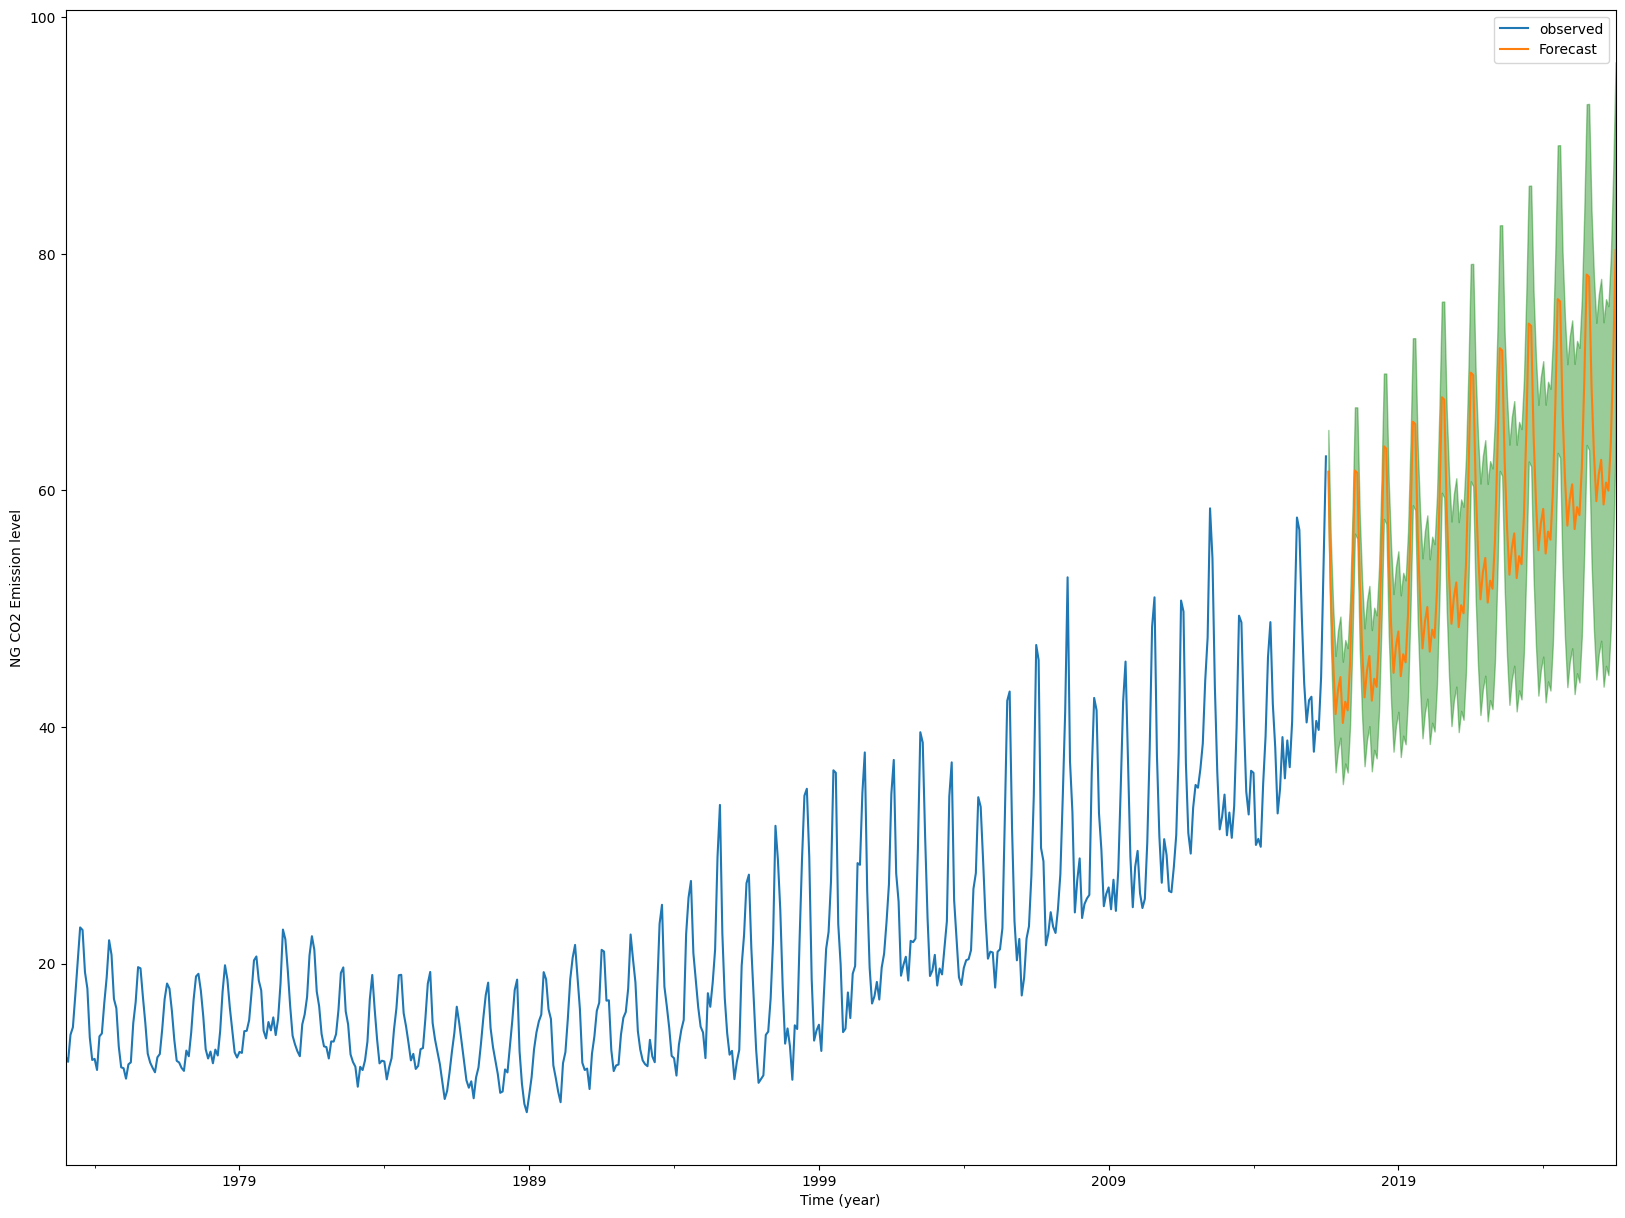

In [124]:
ax = tme.plot(label='observed', figsize=(20, 15))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)
ax.set_xlabel('Time (year)')
ax.set_ylabel('NG CO2 Emission level')

plt.legend()
plt.show()


The forecast indicates that CO2 emissions from natural gas power generation are projected to continue increasing. This trend suggests a growing reliance on natural gas as an energy source, which may have significant implications for overall emissions and climate change strategies. Monitoring this trajectory will be crucial for understanding the environmental impact and making informed decisions regarding energy policies and sustainability initiatives.